# Data Glacier Internship Final Project

# Connect to Google Drive

Mount GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/GDrive')

Mounted at /content/GDrive


Move to the Target Directory by using the Copied Path

In [ ]:
%cd /content/

/content


List the Files present into the Current Directory

In [ ]:
!ls

 Dataset_DA.xlsx	       'EDA _Pipeline1.ipynb'	  Model.h5
 Dataset_Dummy.xlsx	        EDA_Pipeline2.ipynb	  PPG2ABP_UCI.ipynb
 Dataset_Transformed_DA.xlsx    Healthcare_dataset.xlsx   __pycache__
 Dataset.xlsx		        Images			  Unet_Model.py
 DG_Project_Health_Plus.ipynb   ml_models.py


# Import Necessary Documents and Libraries

In [5]:
%cd /content/
!gdown --id 1jhKhP0yE2ldQDpxwNNWLDZDmq1PKJluP
!gdown --id 1jhtHScKs9s24MIUIdzstX9o_bJwMyqSO
!gdown --id 1X-UAbmJtGto7fYIe3VPELsOxDCQZI-ns
!gdown --id 1CWuvegZri_p0ECPktTN7a3IFTW69Pudc
!gdown --id 1n0GQ6sZPfvynYaJPrPaXpojbZvXVVRhz
!gdown --id 1bD-wz_AwTzHEw6nrWe5VhDr3oZE-H8G5
!gdown --id 1G7v6ZZzYfQ2LFh29Lc7RPe9ThM0nwGWZ
!gdown --id 1nFDnQJtbu5Pe5SENYbZPjjb4j6Q-hslm
!gdown --id 1TtGRU5j3rmPOuUGnrIuUPAuGr6RZhrv9
!gdown --id 18RX-P151XnWiFgOor6EGU3RB-Usu9Ul2
!gdown --id 1UNHUeqM4vjpHSGE816EzJy9wpLzXhQDD
!gdown --id 1-J7JJpw0qdti8UFRQKiWUPl3AVQp9JO0
!gdown --id 1-sxPHXy2mxMXifUbDSiqZFUDMj9uLgKS
!gdown --id 1m3hzV5AUH9PNfrCghRagSf0cSVICbfKw

/content
Downloading...
From: https://drive.google.com/uc?id=1jhKhP0yE2ldQDpxwNNWLDZDmq1PKJluP
To: /content/Demographics.png
100% 90.3k/90.3k [00:00<00:00, 33.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jhtHScKs9s24MIUIdzstX9o_bJwMyqSO
To: /content/NTM Speciality Type and Specialist Flag.png
100% 66.4k/66.4k [00:00<00:00, 25.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1X-UAbmJtGto7fYIe3VPELsOxDCQZI-ns
To: /content/Standard Error.png
100% 66.5k/66.5k [00:00<00:00, 25.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CWuvegZri_p0ECPktTN7a3IFTW69Pudc
To: /content/Skewness.png
100% 69.0k/69.0k [00:00<00:00, 61.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n0GQ6sZPfvynYaJPrPaXpojbZvXVVRhz
To: /content/Risk Factors.png
100% 70.8k/70.8k [00:00<00:00, 25.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bD-wz_AwTzHEw6nrWe5VhDr3oZE-H8G5
To: /content/Concomitancy of Drugs.png
100% 51.6k/51.6k [00:00<00:00, 43.8MB/s]
Downloading...


In [6]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import PIL
import h5py
import scipy
import PIL.Image
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, classification_report
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import plot_model

In [7]:
%matplotlib inline
sns.set_style('white')

In [8]:
%cd /content/
from ml_models import *

/content


# Data Analysis

Import Dataset and Display Contents Partially

In [9]:
%cd /content/
df = pd.read_excel('Dataset.xlsx')

/content


In [10]:
df.drop(columns= ['Ptid'],inplace= True)

In [11]:
df.head()

,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Persistency_Flag
0,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,0,1,0,0,3,2,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,0,1,2,2,2,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,1,0,1,0,3,3,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0
3,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,1,0,0,0,0,1,1,1,0,3,3,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,1,0,0,0,0,1,0,2,2,2,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


## Describe the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Gender                                                              3424 non-null   object
 1   Race                                                                3424 non-null   object
 2   Ethnicity                                                           3424 non-null   object
 3   Region                                                              3424 non-null   object
 4   Age_Bucket                                                          3424 non-null   object
 5   Ntm_Speciality                                                      3424 non-null   object
 6   Ntm_Specialist_Flag                                                 3424 non-null   object
 7   Ntm_Speciality_Bucket   

In [ ]:
df.describe()

,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Persistency_Flag
count,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000
mean,0.235105,0.263435,3.016063,0.273364,0.161215,0.121787,0.436040,0.569801,1.156250,1.140187,2.356308,2.230140,0.949474,0.746787,0.892523,0.447722,0.441881,0.394860,0.319217,0.291764,0.231016,0.238610,0.227512,0.197722,0.151285,0.515479,0.267815,0.189544,0.183995,0.345210,0.360105,0.284171,0.280082,0.186040,0.176110,0.166764,0.128213,0.145152,0.103096,0.040596,0.000876,0.037967,0.000584,0.037091,0.003505,0.074766,0.188084,0.137266,0.005257,0.104556,0.012266,0.477804,0.056075,0.019568,0.015771,0.003213,0.004089,0.020152,1.239486,0.376460
std,0.424126,0.440560,8.136545,0.445751,0.367783,0.327088,0.495965,0.495176,0.833039,0.845450,0.766541,0.634174,0.219059,0.434915,0.309764,0.497332,0.496683,0.488892,0.466241,0.454641,0.421544,0.426296,0.419287,0.398339,0.358379,0.499833,0.442886,0.391998,0.387537,0.475506,0.480101,0.451084,0.449105,0.389196,0.380969,0.372819,0.334375,0.352305,0.304128,0.197381,0.029591,0.191145,0.024165,0.189013,0.059105,0.263052,0.390836,0.344179,0.072325,0.306025,0.110088,0.499580,0.230100,0.138530,0.124607,0.056597,0.063822,0.140540,1.094914,0.484568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

These plots represent the Demographic Proportions of the Dataset in terms of Gender, Race, Ethnicity, Age-Bucket, Region and IDN-Indicator. Data Imabalance can be noticed in terms of Gender and Ethnicity.

/content


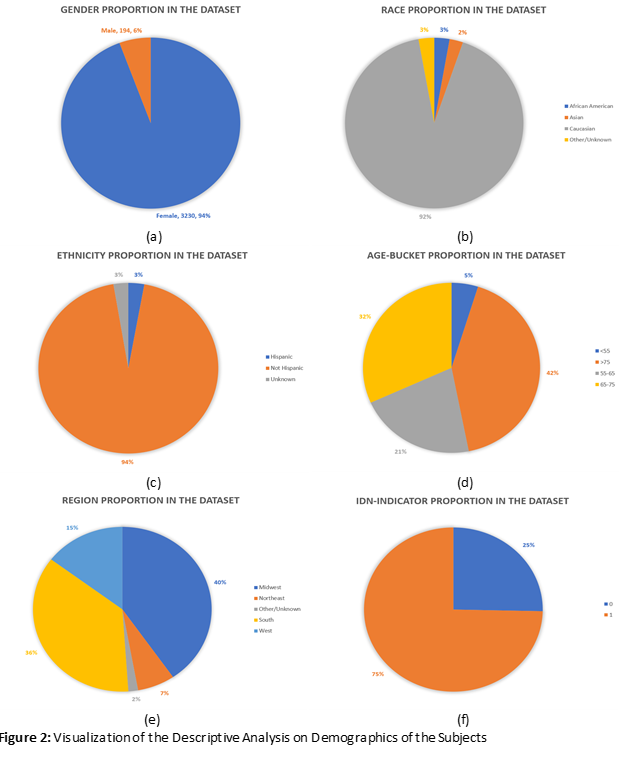

In [ ]:
%cd /content/
PIL.Image.open('Demographics.png')

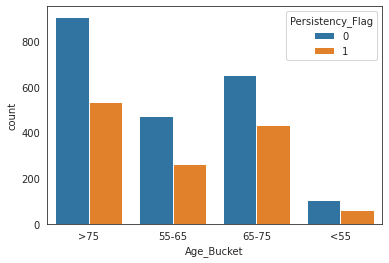

In [ ]:
# checking the Age range of the patients per Persistency status 
sns.countplot(x="Age_Bucket", hue="Persistency_Flag", data=df)

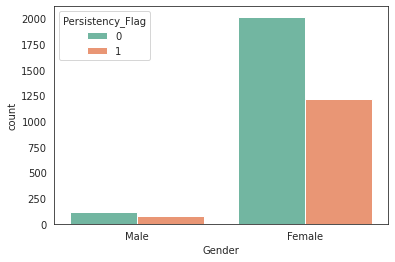

In [ ]:
# checking the gender of the patients per Persistency status 
sns.countplot(x="Gender", hue="Persistency_Flag", data=df, palette="Set2")

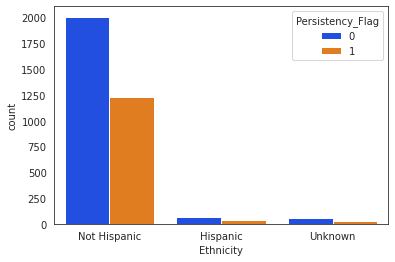

In [ ]:
# checking the Ethnicity of the patients per Persistency status 
sns.countplot(x="Ethnicity", hue="Persistency_Flag", data=df, palette="bright")

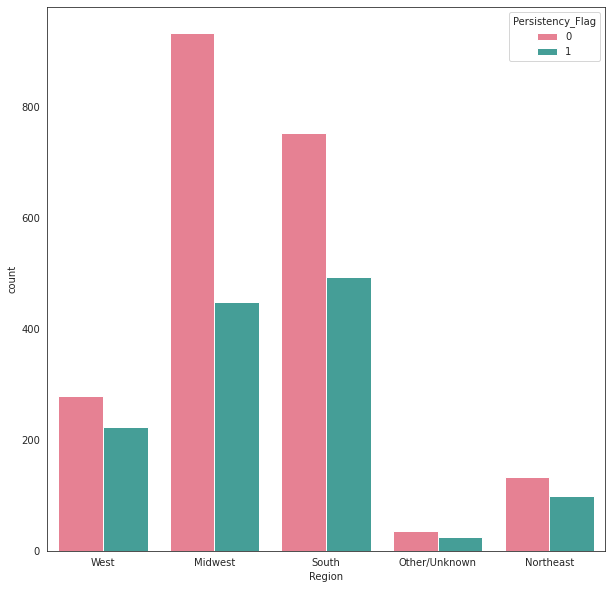

In [ ]:
# checking the Region of the patients per Persistency status 
figure(figsize=(10, 10))
sns.countplot(x="Region", hue="Persistency_Flag", data=df, palette="husl")

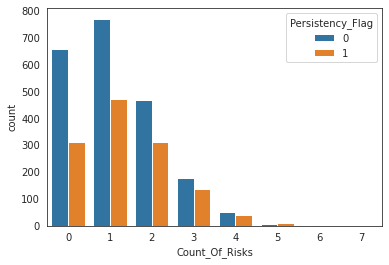

In [ ]:
# checking the Region of the patients per Persistency status
sns.countplot(x="Count_Of_Risks", hue="Persistency_Flag", data=df)

The following colum chart helps us visualize the NTM Speciality Type and Specialist Flag of the responsible medical staff. It can be seen that for some diseases, the doctor was always a specialist. On the other hand, most cases were dealt by General Practitioners.

/content


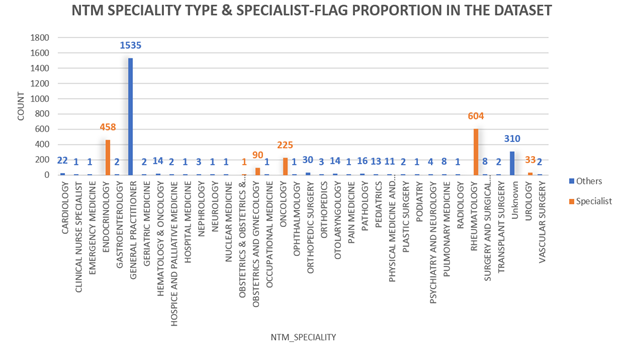

In [ ]:
%cd /content/
PIL.Image.open('NTM Speciality Type and Specialist Flag.png')

This stacked percentage column chart represents the Concomitancy of various drugs. The rates vary for different drugs from as low as 10% to as high as 35%.

/content


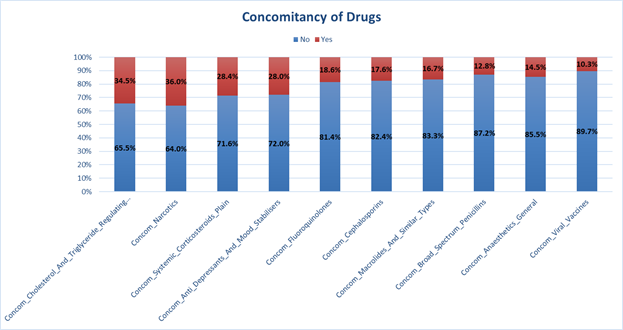

In [ ]:
%cd /content/
PIL.Image.open('Concomitancy of Drugs.png')

Comorbidity of diseases have been represented by the following column chart. For some cases, the rate is quite high.

/content


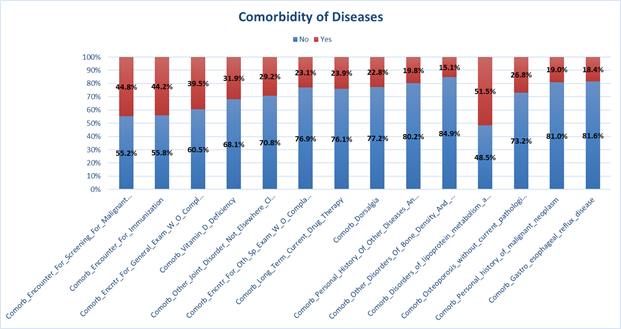

In [ ]:
%cd /content/
PIL.Image.open('Comorbidity of Disases.png')

This chart shows various Risk Factors among the patients regarding the medication which related to Patient Persistency of the Drug.

/content


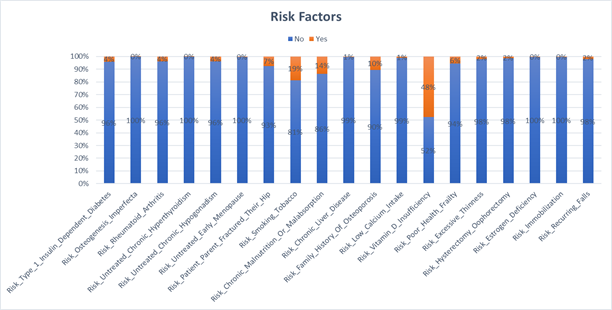

In [ ]:
%cd /content/
PIL.Image.open('Risk Factors.png')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


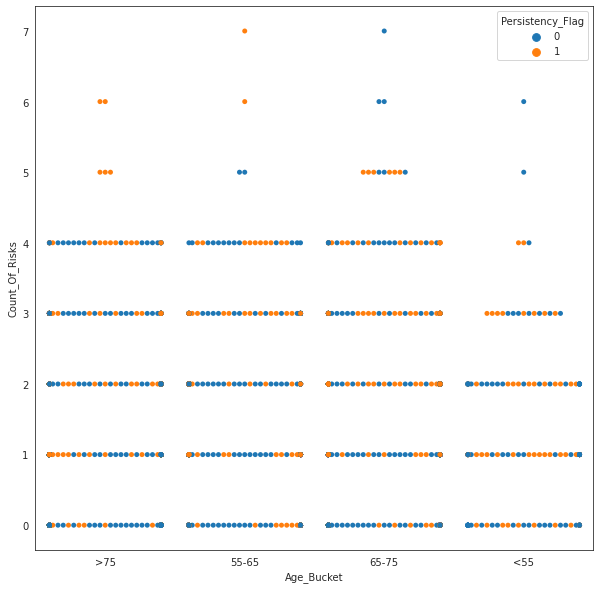

In [ ]:
# checking the distribution of patients based on age and count of risk
figure(figsize=(10, 10))
sns.swarmplot(x=df["Age_Bucket"], y=df["Count_Of_Risks"], hue=df["Persistency_Flag"])

0    2135
1    1289
Name: Persistency_Flag, dtype: int64


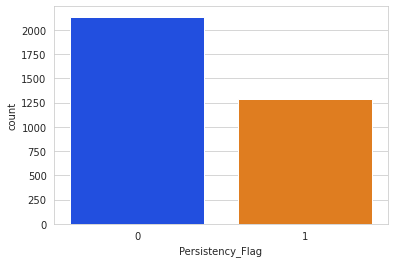

In [ ]:
# checking the Persistency status counts of the patients 
sns.set_style("whitegrid")
persistency_count=df.Persistency_Flag.value_counts() 
sns.countplot(x="Persistency_Flag",data = df,palette="bright")
print(persistency_count)

## Anomaly or Imabalance in the Dataset and Data Cleansing

Check for Null or NaN values in the Dataset

In [ ]:
print(f'Total NULL values in the Original DataFrame = {df.isnull().sum().sum()}')
print(df.isnull().sum()) 
pd.options.display.max_rows = 3500
df.isna().sum()

Total NULL values in the Original DataFrame = 0
Gender                      0
Race                        0
Ethnicity                   0
Region                      0
Age_Bucket                  0
                           ..
Risk_Estrogen_Deficiency    0
Risk_Immobilization         0
Risk_Recurring_Falls        0
Count_Of_Risks              0
Persistency_Flag            0
Length: 68, dtype: int64


Gender                                                                0
Race                                                                  0
Ethnicity                                                             0
Region                                                                0
Age_Bucket                                                            0
Ntm_Speciality                                                        0
Ntm_Specialist_Flag                                                   0
Ntm_Speciality_Bucket                                                 0
Gluco_Record_Prior_Ntm                                                0
Gluco_Record_During_Rx                                                0
Dexa_Freq_During_Rx                                                   0
Dexa_During_Rx                                                        0
Frag_Frac_Prior_Ntm                                                   0
Frag_Frac_During_Rx                                             

No Null values in the Dataset, which is great!

The following 3 charts show the Standard Error, Skewness and Kurtosis present in the dataset after all columns (i.e., variables) were normalized within the same range. It greatly helped in determining the imbalance and non-normality present in the dataset.

/content


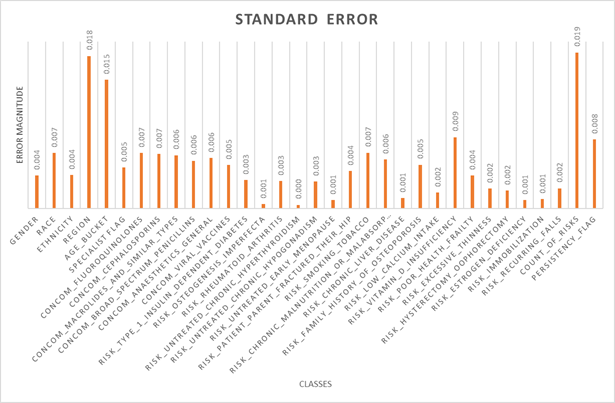

In [ ]:
%cd /content/
PIL.Image.open('Standard Error.png')

/content


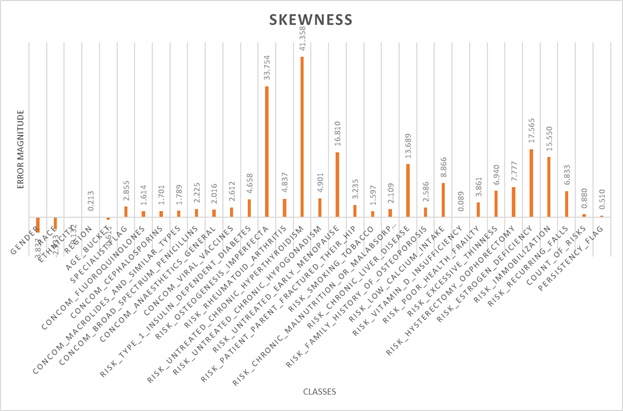

In [ ]:
%cd /content/
PIL.Image.open('Skewness.png')

/content


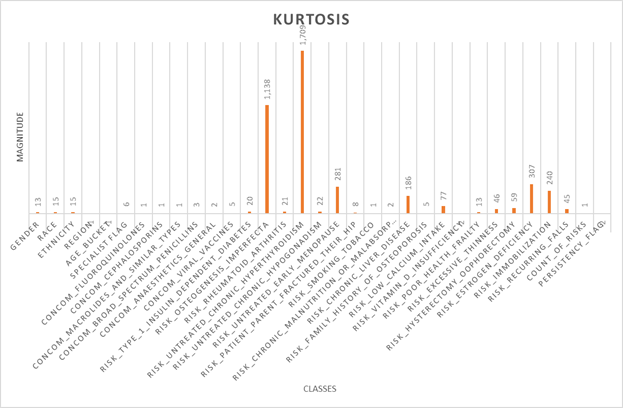

In [ ]:
%cd /content/
PIL.Image.open('Kurtosis.png')

Check the correlation level among independent variables to detecting inter-dependence and redundancy among them.

In [ ]:
# finding correlation matrix 
corr = df_dummy.corr()
# corr_threshold=(corr>0.3) & (corr!= 1)
corr_threshold=(corr>0.0001) & (corr!= 1)

In [ ]:
df_corr = pd.DataFrame(data=corr)
df_corr.head(30)

,Female,Male,African American,Asian,Caucasian,Other/Unknown,Hispanic,Not Hispanic,Unknown,Midwest,Northeast,Other/Unknown,South,West,55-65,65-75,<55,>75,CARDIOLOGY,CLINICAL NURSE SPECIALIST,EMERGENCY MEDICINE,ENDOCRINOLOGY,GASTROENTEROLOGY,GENERAL PRACTITIONER,GERIATRIC MEDICINE,HEMATOLOGY & ONCOLOGY,HOSPICE AND PALLIATIVE MEDICINE,HOSPITAL MEDICINE,NEPHROLOGY,NEUROLOGY,NUCLEAR MEDICINE,OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,OBSTETRICS AND GYNECOLOGY,OCCUPATIONAL MEDICINE,ONCOLOGY,OPHTHALMOLOGY,ORTHOPEDIC SURGERY,ORTHOPEDICS,OTOLARYNGOLOGY,PAIN MEDICINE,...,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Persistency_Flag
Female,1.000000,-1.000000,0.010634,0.014367,-0.021522,0.011390,0.019339,0.001612,-0.022337,0.021521,-0.019377,0.013474,-0.014036,-0.001990,0.057072,0.036732,-0.050551,-0.060061,0.003897,0.004189,0.004189,-0.022454,0.005925,0.045650,-0.046360,-0.004093,0.005925,0.004189,0.007257,0.004189,0.004189,0.004189,0.040266,0.004189,0.049700,0.004189,-0.031181,0.007257,-0.004093,0.004189,...,0.062394,-0.028778,-0.026707,-0.017895,0.018859,0.017702,-0.000125,-0.023298,0.002266,-0.008049,-0.008262,0.003163,0.015011,0.006790,-0.042565,-0.012362,-0.004258,-0.013773,-0.012461,-0.058407,0.007257,0.015637,0.005925,-0.105644,0.014534,0.026439,-0.004887,-0.012372,0.000347,0.021815,0.027311,0.032103,-0.006158,-0.001859,0.031023,0.013913,-0.004093,-0.036774,-0.002931,-0.010343
Male,-1.000000,1.000000,-0.010634,-0.014367,0.021522,-0.011390,-0.019339,-0.001612,0.022337,-0.021521,0.019377,-0.013474,0.014036,0.001990,-0.057072,-0.036732,0.050551,0.060061,-0.003897,-0.004189,-0.004189,0.022454,-0.005925,-0.045650,0.046360,0.004093,-0.005925,-0.004189,-0.007257,-0.004189,-0.004189,-0.004189,-0.040266,-0.004189,-0.049700,-0.004189,0.031181,-0.007257,0.004093,-0.004189,...,-0.062394,0.028778,0.026707,0.017895,-0.018859,-0.017702,0.000125,0.023298,-0.002266,0.008049,0.008262,-0.003163,-0.015011,-0.006790,0.042565,0.012362,0.004258,0.013773,0.012461,0.058407,-0.007257,-0.015637,-0.005925,0.105644,-0.014534,-0.026439,0.004887,0.012372,-0.000347,-0.021815,-0.027311,-0.032103,0.006158,0.001859,-0.031023,-0.013913,0.004093,0.036774,0.002931,0.010343
African American,0.010634,-0.010634,1.000000,-0.026790,-0.570516,-0.028845,0.002996,0.001899,-0.005802,-0.001347,-0.031392,0.031648,0.049523,-0.054938,-0.005798,-0.008144,0.036381,-0.003334,-0.013585,-0.002887,-0.002887,0.001529,-0.004084,-0.034286,-0.004084,0.044908,-0.004084,-0.002887,0.055098,-0.002887,-0.002887,-0.002887,0.027820,-0.002887,-0.008918,-0.002887,0.003199,-0.005003,-0.010824,-0.002887,...,0.004444,-0.011130,-0.019569,-0.016893,-0.006809,-0.028360,0.006254,-0.036326,-0.020557,-0.017934,0

From the correlation matrix, it is difficult to have a complete understanding of the relations between the parameters. The low correlation values actually show a good thing that there is less relation among the independent variables, which is required for a better prediction performance of Machine Learning done in the next section. If the independent variables are too inter-related, they become redundant and performance dropped unless the redundancy is removed

## Data Transformations, Statistical and ML based Analysis, and Patient Persitency Prediction


### Create Dummy Dataset and apply Machine Learning (ML) on the Whole Dataset

It is a required step to convert Categorical Variables to Dummy Numerical Variables before applying any Machine Learning or Statistical Techniques since they can only run on numerical variables.

In [12]:
df_dummy = pd.DataFrame()

In [13]:
for i in range(0,len(df.columns)):
  if(i<=7):
    X = df[df.columns[i]]
    Y = pd.get_dummies(X)
    df_dummy = pd.concat([df_dummy, Y], axis=1)
  elif(i>7):
    X = df[df.columns[i]]
    df_dummy = pd.concat([df_dummy, X], axis=1)

In [14]:
df_dummy.head(10)

,Female,Male,African American,Asian,Caucasian,Other/Unknown,Hispanic,Not Hispanic,Unknown,Midwest,Northeast,Other/Unknown,South,West,55-65,65-75,<55,>75,CARDIOLOGY,CLINICAL NURSE SPECIALIST,EMERGENCY MEDICINE,ENDOCRINOLOGY,GASTROENTEROLOGY,GENERAL PRACTITIONER,GERIATRIC MEDICINE,HEMATOLOGY & ONCOLOGY,HOSPICE AND PALLIATIVE MEDICINE,HOSPITAL MEDICINE,NEPHROLOGY,NEUROLOGY,NUCLEAR MEDICINE,OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,OBSTETRICS AND GYNECOLOGY,OCCUPATIONAL MEDICINE,ONCOLOGY,OPHTHALMOLOGY,ORTHOPEDIC SURGERY,ORTHOPEDICS,OTOLARYNGOLOGY,PAIN MEDICINE,...,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Persistency_Flag
0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0
3,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2,0
6,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


#### Train-Test Split - 20% Test Set

In [15]:
X_Data = df_dummy.iloc[:,0:-1].values
Y_Data = df_dummy.iloc[:,-1].values

In [16]:
print(X_Data.shape)
print(Y_Data.shape)

(3424, 118)
(3424,)


In [17]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.20, random_state=42)

In [18]:
print(X_Train.shape, X_Test.shape)
print(Y_Train.shape, Y_Test.shape)

(2739, 118) (685, 118)
(2739,) (685,)


In [19]:
X_Train = X_Train.astype('int')
X_Test = X_Test.astype('int')
Y_Train = Y_Train.astype('int')
Y_Test = Y_Test.astype('int')

Now Apply ML

#### Machine Learning (ML)

##### Logistic Regression based Classifier

In [34]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error: %f" % MAE)
print("Score: %f" % Score)

Mean Absolute Error: 0.191241
Score: 0.832055


In [35]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[375,  56],
       [ 75, 179]])

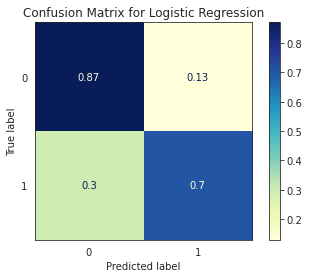

In [36]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Logistic Regression')
plt.show(matrix)

In [37]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.8087591240875912
Precision = 0.8067722731272973
Recall = 0.7873970075086322
f1-Score = 0.8071059993341674


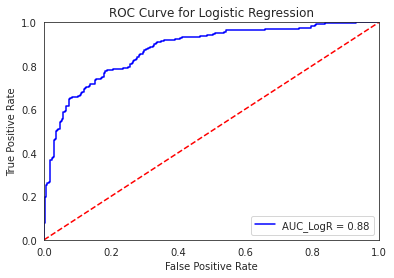

In [38]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_LogR, tpr_LogR, threshold = roc_curve(Y_Test, Probs)
roc_auc_LogR = auc(fpr_LogR, tpr_LogR)
#
plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr_LogR, tpr_LogR, 'b', label = 'AUC_LogR = %0.2f' % roc_auc_LogR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,1
0,0
1,1
1,1
0,0
1,1
0,0
1,0
1,1
1,1
0,0
1,0
1,1
1,1
0,0
0,0
0,0
1,1
0,0
1,1
1,1
0,0
0,0
0,0
1,1
1,0
0,0
0,0
1,0
0,0
0,1
0,0
0,0
1,1
0,0
1,1
0,0
1,1
0,0
0,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,1
0,0
1,1
1,1
0,0
1,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
1,0
0,0
1,0
1,1
0,1
0,0
1,1
0,0
0,1
0,1
0,0
0,1
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,1
0,0
1,1
0,0
0,0
1,1
0,0
1,1
1,1
0,1
1,1
0,0
1,0
0,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0
1,1
0,0
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
0,0
0,1
0,0
1,1
0,0
1,1
1,0
0,0
0,0
0,1
0,1
1,1
0,1
1,0
0,0
1,0
1,1
0,0
1,0
1,1
1,1
0,1
0,0
0,0
0,0
0,1
0,0
0,0
0,1
0,0
0,0
0,0
1,1
0,0
0,0
1,1
0,0
1,1
0,0
0,1
1,1
1,1
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
1,0
0,0
0,1
1,1
0,0
0,0
1,0
1,1
0,1
0,0
1,1
1,1
1,1
1,0
1,1
0,0
1,0
0,1
1,1
1,0
1,1
0,0
0,0
0,1
0,1
0,0
1,0
1,1
0,1
0,0
0,0
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,1
0,1
0,0
1,1
1,0
1,1
0,0
0,0
0,1
1,1
1,1
0,0


##### K-Nearest Neighbour (KNN) Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 19)
neigh = neigh.fit(X_Train, Y_Train)
Preds = neigh.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = neigh.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.224818
Score for Willingness: 0.804308


In [41]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[396,  35],
       [119, 135]])

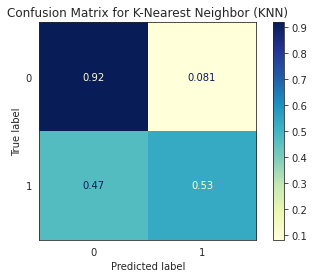

In [42]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(neigh, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for K-Nearest Neighbor (KNN)')
plt.show(matrix)

In [43]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7751824817518248
Precision = 0.7782709358989857
Recall = 0.7251447832362022
f1-Score = 0.7628941493740051


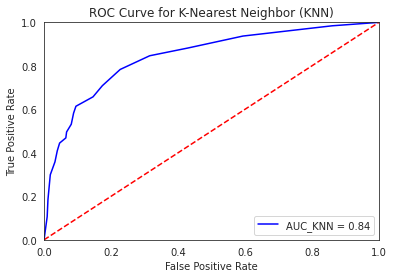

In [44]:
Probs = neigh.predict_proba(X_Test)[:,1]
fpr_KNN, tpr_KNN, threshold = roc_curve(Y_Test, Probs)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
#
plt.title('ROC Curve for K-Nearest Neighbor (KNN)')
plt.plot(fpr_KNN, tpr_KNN, 'b', label = 'AUC_KNN = %0.2f' % roc_auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
Probs.shape

(685,)

In [46]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,0
0,0
0,0
0,0
1,1
1,1
0,0
1,1
0,0
1,0
1,1
1,0
0,0
1,1
1,1
1,1
0,0
0,0
0,0
1,1
0,1
1,1
1,1
0,0
0,0
0,0
1,1
1,0
0,0
0,0
1,0
0,0
0,1
0,0
0,0
1,1
0,0
1,1
0,1
1,1
0,0
0,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
1,1
0,0
1,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
1,0
0,0
1,0
1,1
0,0
0,0
1,1
0,0
0,1
0,1
0,0
0,0
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,0
0,1
0,0
1,1
0,0
0,0
1,1
0,0
1,1
1,1
0,1
1,1
0,0
1,1
0,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0
1,1
0,0
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
0,0
0,0
0,0
1,0
0,0
1,0
1,0
0,0
0,0
0,0
0,1
1,0
0,1
1,0
0,0
1,0
1,0
0,0
1,0
1,1
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
0,0
1,1
0,0
1,1
0,0
0,0
1,1
1,1
1,0
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
1,0
0,0
0,0
1,1
0,0
0,0
1,0
1,0
0,0
0,0
1,1
1,1
1,0
1,0
1,1
0,0
1,0
0,1
1,1
1,0
1,1
0,0
0,0
0,0
0,0
0,1
1,0
1,1
0,0
0,0
0,1
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
1,1
0,0
0,0
1,0
1,0
1,1
0,0
0,0
0,0
1,1
1,1
0,0


##### Support Vector Machine (SVM) Classifier(s) - SVCs

In [47]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability= True))
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.213139
Score for Willingness: 0.898138


In [48]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[373,  58],
       [ 88, 166]])

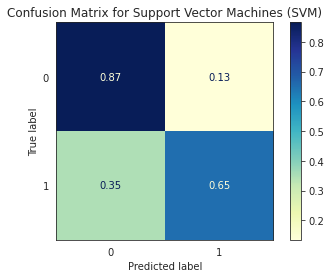

In [49]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Support Vector Machines (SVM)')
plt.show(matrix)

In [50]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7868613138686131
Precision = 0.7838814948687963
Recall = 0.7594862707126806
f1-Score = 0.7837570321058592


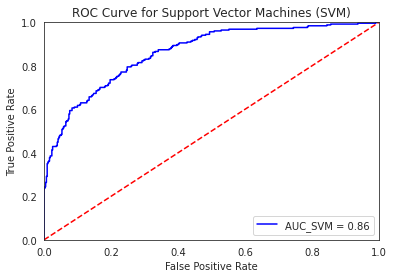

In [51]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_SVM, tpr_SVM, threshold = roc_curve(Y_Test, Probs)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
#
plt.title('ROC Curve for Support Vector Machines (SVM)')
plt.plot(fpr_SVM, tpr_SVM, 'b', label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Stochastic Gradient Descent (SGD) Classifier

In [52]:
from sklearn.linear_model import SGDClassifier
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, loss='log'))
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.223358
Score for Willingness: 0.798101


In [53]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[354,  77],
       [ 76, 178]])

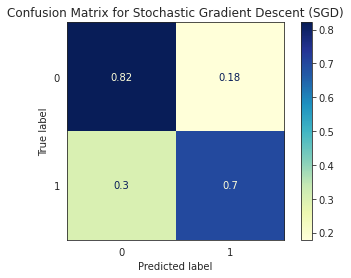

In [54]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Stochastic Gradient Descent (SGD)')
plt.show(matrix)

In [55]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7766423357664234
Precision = 0.7768251337200981
Recall = 0.7610665546157078
f1-Score = 0.7767320357974676


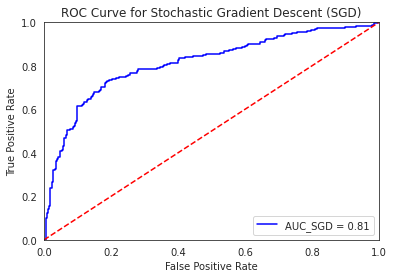

In [56]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_SGD, tpr_SGD, threshold = roc_curve(Y_Test, Probs)
roc_auc_SGD = auc(fpr_SGD, tpr_SGD)
#
plt.title('ROC Curve for Stochastic Gradient Descent (SGD)')
plt.plot(fpr_SGD, tpr_SGD, 'b', label = 'AUC_SGD = %0.2f' % roc_auc_SGD)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.272993
Score for Willingness: 1.000000


In [58]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[334,  97],
       [ 90, 164]])

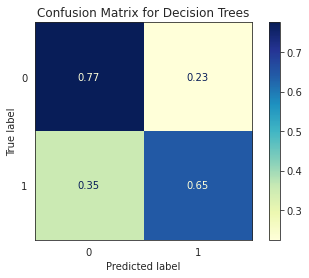

In [59]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Decision Trees')
plt.show(matrix)

In [60]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.727007299270073
Precision = 0.728636034321819
Recall = 0.7103056433491057
f1-Score = 0.7277450754896122


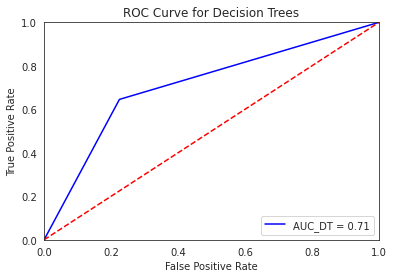

In [61]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_DT, tpr_DT, threshold = roc_curve(Y_Test, Probs)
roc_auc_DT = auc(fpr_DT, tpr_DT)
#
plt.title('ROC Curve for Decision Trees')
plt.plot(fpr_DT, tpr_DT, 'b', label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### GradBoost Classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.191241
Score for Willingness: 0.866009


In [63]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[378,  53],
       [ 78, 176]])

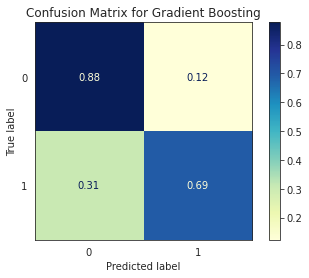

In [64]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show(matrix)

In [65]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.8087591240875912
Precision = 0.8065551672826283
Recall = 0.7849717741198823
f1-Score = 0.8065048778593307


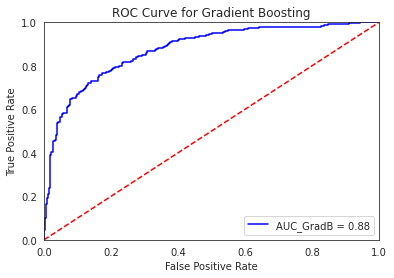

In [66]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_GradB, tpr_GradB, threshold = roc_curve(Y_Test, Probs)
roc_auc_GradB = auc(fpr_GradB, tpr_GradB)
#
plt.title('ROC Curve for Gradient Boosting')
plt.plot(fpr_GradB, tpr_GradB, 'b', label = 'AUC_GradB = %0.2f' % roc_auc_GradB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.201460
Score for Willingness: 1.000000


In [68]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[378,  53],
       [ 85, 169]])

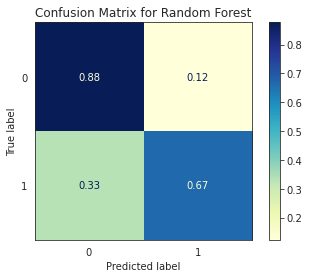

In [69]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Random Forest')
plt.show(matrix)

In [70]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7985401459854015
Precision = 0.7959636355941001
Recall = 0.7711922465608272
f1-Score = 0.7953739316723114


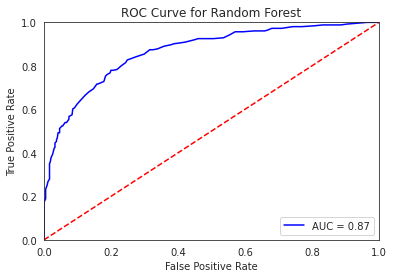

In [71]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_RF, tpr_RF, threshold = roc_curve(Y_Test, Probs)
roc_auc_RF = auc(fpr_RF, tpr_RF)
#
plt.title('ROC Curve for Random Forest')
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,1
0,0
1,1
1,1
0,0
1,1
0,0
1,0
1,1
1,1
0,0
1,0
1,1
1,1
0,0
0,0
0,0
1,1
0,0
1,1
1,1
0,0
0,0
0,0
1,1
1,0
0,0
0,0
1,1
0,0
0,1
0,0
0,0
1,1
0,0
1,1
0,1
1,1
0,0
0,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
1,1
0,0
1,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
1,0
0,0
1,0
1,1
0,1
0,0
1,1
0,0
0,1
0,1
0,0
0,1
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,1
0,0
1,1
0,0
0,0
1,1
0,0
1,1
1,1
0,1
1,1
0,0
1,1
0,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0
1,1
0,0
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,1
0,0
1,1
0,0
0,1
0,0
1,1
0,0
1,1
1,0
0,0
0,0
0,0
0,1
1,0
0,1
1,0
0,0
1,0
1,0
0,0
1,0
1,1
1,1
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
0,0
1,1
0,1
1,1
0,0
0,0
1,0
1,1
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,0
0,0
0,1
0,0
1,1
1,0
0,0
0,1
1,1
0,0
0,0
1,0
1,0
0,1
0,0
1,1
1,1
1,1
1,0
1,1
0,0
1,0
0,1
1,1
1,0
1,1
0,0
0,0
0,1
0,1
0,1
1,1
1,1
0,1
0,0
0,1
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
1,1
0,1
0,0
1,1
1,0
1,1
0,0
0,0
0,0
1,1
1,1
0,0


##### Extra-Trees Classifier

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.195620
Score for Willingness: 1.000000


In [74]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[374,  57],
       [ 77, 177]])

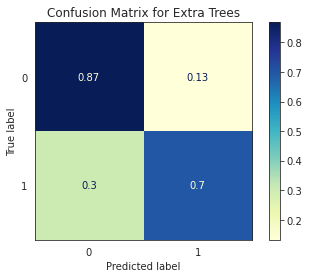

In [75]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Extra Trees')
plt.show(matrix)

In [76]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.8043795620437956
Precision = 0.802252320108827
Recall = 0.7822999068271919
f1-Score = 0.8025888653095955


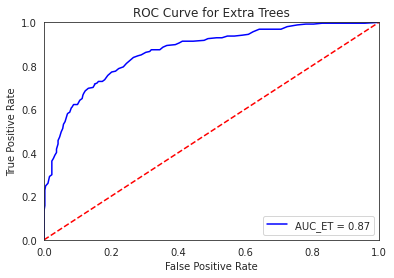

In [77]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_ET, tpr_ET, threshold = roc_curve(Y_Test, Probs)
roc_auc_ET = auc(fpr_ET, tpr_ET)
#
plt.title('ROC Curve for Extra Trees')
plt.plot(fpr_ET, tpr_ET, 'b', label = 'AUC_ET = %0.2f' % roc_auc_ET)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### AdaBoost Classifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.185401
Score for Willingness: 0.829865


In [79]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[377,  54],
       [ 73, 181]])

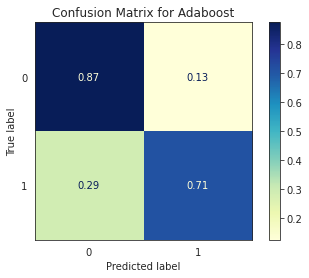

In [80]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Adaboost')
plt.show(matrix)

In [81]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.8145985401459854
Precision = 0.8127244741246915
Recall = 0.7936542009974972
f1-Score = 0.8129958924842692


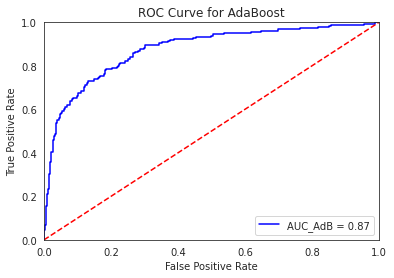

In [82]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_AdB, tpr_AdB, threshold = roc_curve(Y_Test, Probs)
roc_auc_AdB = auc(fpr_AdB, tpr_AdB)
#
plt.title('ROC Curve for AdaBoost')
plt.plot(fpr_AdB, tpr_AdB, 'b', label = 'AUC_AdB = %0.2f' % roc_auc_AdB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### XgBoost Classifier

In [83]:
import xgboost as xgb
clf = xgb.XGBClassifier(objective='reg:tweedie')
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.205839
Score for Willingness: 0.849215


In [84]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[400,  31],
       [110, 144]])

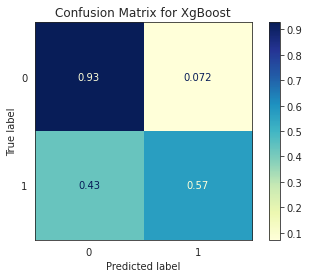

In [85]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for XgBoost')
plt.show(matrix)

In [86]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7941605839416058
Precision = 0.7986057371853852
Recall = 0.7475016898989715
f1-Score = 0.7838484467509343


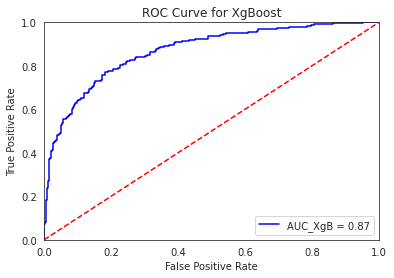

In [87]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_XgB, tpr_XgB, threshold = roc_curve(Y_Test, Probs)
roc_auc_XgB = auc(fpr_XgB, tpr_XgB)
#
plt.title('ROC Curve for XgBoost')
plt.plot(fpr_XgB, tpr_XgB, 'b', label = 'AUC_XgB = %0.2f' % roc_auc_XgB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Multi-Layer Perceptron (MLP) Classifier

In [88]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=1000)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.248175
Score for Willingness: 1.000000


In [89]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[344,  87],
       [ 83, 171]])

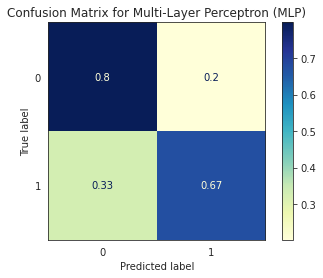

In [90]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Multi-Layer Perceptron (MLP)')
plt.show(matrix)

In [91]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7518248175182481
Precision = 0.7526588607954737
Recall = 0.7356860989824068
f1-Score = 0.7522157548959556


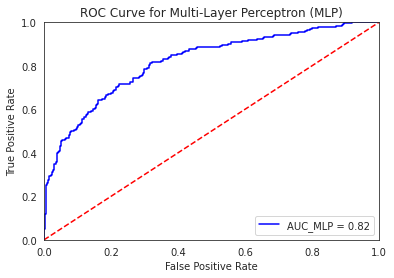

In [92]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_MLP, tpr_MLP, threshold = roc_curve(Y_Test, Probs)
roc_auc_MLP = auc(fpr_MLP, tpr_MLP)
#
plt.title('ROC Curve for Multi-Layer Perceptron (MLP)')
plt.plot(fpr_MLP, tpr_MLP, 'b', label = 'AUC_MLP = %0.2f' % roc_auc_MLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Combined ROC Plot(s)

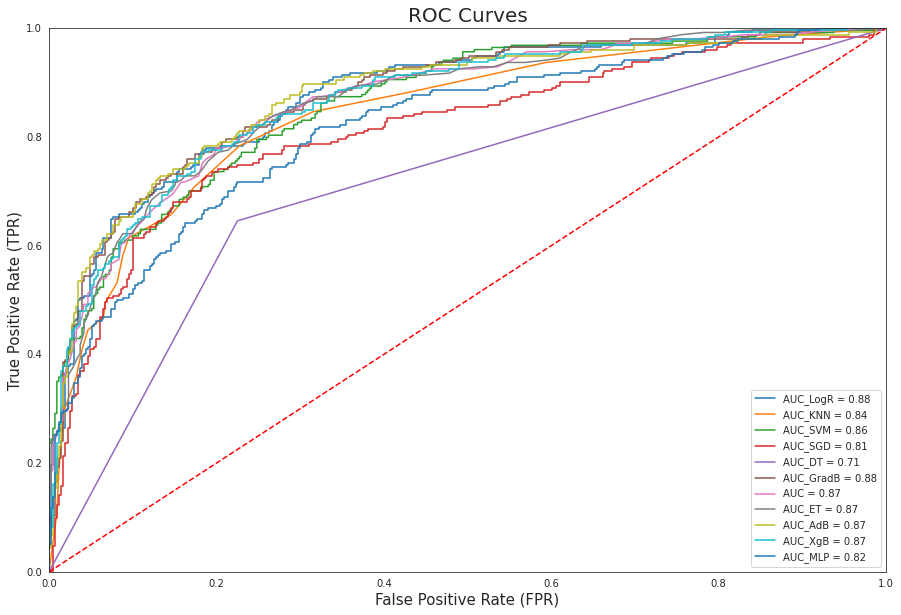

In [93]:
plt.figure(figsize = (15,10))
plt.title('ROC Curves', fontsize = 20)
plt.plot(fpr_LogR, tpr_LogR, label = 'AUC_LogR = %0.2f' % roc_auc_LogR)
plt.plot(fpr_KNN, tpr_KNN, label = 'AUC_KNN = %0.2f' % roc_auc_KNN)
plt.plot(fpr_SVM, tpr_SVM, label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.plot(fpr_SGD, tpr_SGD, label = 'AUC_SGD = %0.2f' % roc_auc_SGD)
plt.plot(fpr_DT, tpr_DT, label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.plot(fpr_GradB, tpr_GradB, label = 'AUC_GradB = %0.2f' % roc_auc_GradB)
plt.plot(fpr_RF, tpr_RF, label = 'AUC = %0.2f' % roc_auc_RF)
plt.plot(fpr_ET, tpr_ET, label = 'AUC_ET = %0.2f' % roc_auc_ET)
plt.plot(fpr_AdB, tpr_AdB, label = 'AUC_AdB = %0.2f' % roc_auc_AdB)
plt.plot(fpr_XgB, tpr_XgB, label = 'AUC_XgB = %0.2f' % roc_auc_XgB)
plt.plot(fpr_MLP, tpr_MLP, label = 'AUC_MLP = %0.2f' % roc_auc_MLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)', fontsize = 15)
plt.xlabel('False Positive Rate (FPR)', fontsize = 15)
plt.show()

### Dominance Analysis to Create Dominant Subset and apply ML

In [ ]:
!pip install dominance-analysis

In [96]:
%cd /content/
df_dummy_DA = pd.read_excel('Dataset_DA.xlsx',sheet_name= 'Dataset')

/content


In [97]:
df_dummy_DA.head(10)

,Gender,Race,Ethnicity,Region,Age_Bucket,CARDIOLOGY,CLINICAL NURSE SPECIALIST,EMERGENCY MEDICINE,ENDOCRINOLOGY,GASTROENTEROLOGY,GENERAL PRACTITIONER,GERIATRIC MEDICINE,HEMATOLOGY & ONCOLOGY,HOSPICE AND PALLIATIVE MEDICINE,HOSPITAL MEDICINE,NEPHROLOGY,NEUROLOGY,NUCLEAR MEDICINE,OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,OBSTETRICS AND GYNECOLOGY,OCCUPATIONAL MEDICINE,ONCOLOGY,OPHTHALMOLOGY,ORTHOPEDIC SURGERY,ORTHOPEDICS,OTOLARYNGOLOGY,PAIN MEDICINE,PATHOLOGY,PEDIATRICS,PHYSICAL MEDICINE AND REHABILITATION,PLASTIC SURGERY,PODIATRY,PSYCHIATRY AND NEUROLOGY,PULMONARY MEDICINE,RADIOLOGY,RHEUMATOLOGY,SURGERY AND SURGICAL SPECIALTIES,TRANSPLANT SURGERY,UROLOGY,Unknown,VASCULAR SURGERY,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Persistency_Flag
0,0,2,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,0,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0
3,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2,0
6,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from dominance_analysis import Dominance
dominance_classification = Dominance(data=df_dummy_DA, target='Persistency_Flag', objective=1, pseudo_r2="mcfadden")

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['CARDIOLOGY', 'ENDOCRINOLOGY', 'GENERAL PRACTITIONER', 'ONCOLOGY', 'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Smoking_Tobacco', 'Risk_Vitamin_D_Insufficiency', 'Count_Of_Risks']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.18241768778491896



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
incr_variable_rsquare = dominance_classification.incremental_rsquare()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide


  0%|          | 0/15 [00:00<?, ?it/s]

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['CARDIOLOGY', 'ENDOCRINOLOGY', 'GENERAL PRACTITIONER', 'ONCOLOGY', 'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Smoking_Tobacco', 'Risk_Vitamin_D_Insufficiency', 'Count_Of_Risks']

Creating models for 32767 possible combinations of 15 features :



100%|██████████| 15/15 [04:12<00:00, 16.84s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################



100%|██████████| 14/14 [04:53<00:00, 20.97s/it]

#########################  Variable Dominance Calculation Done!!!!!  #########################



In [ ]:
plt.show(dominance_classification.plot_incremental_rsquare())

In [ ]:
dominance_classification.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
Concom_Viral_Vaccines,0.0206292,0.0493909,0.030064,0.030723,16.8421
Concom_Macrolides_And_Similar_Types,0.0124461,0.0491113,0.024275,0.0251419,13.7826
Concom_Anaesthetics_General,0.0118375,0.0494141,0.023595,0.0245326,13.4486
Concom_Broad_Spectrum_Penicillins,0.0113609,0.0391462,0.020140,0.0208217,11.4143
Concom_Cephalosporins,0.00504427,0.0490815,0.018650,0.0197719,10.8388
ONCOLOGY,0.0159638,0.0252347,0.019568,0.0197057,10.8025
Concom_Fluoroquinolones,0.0037385,0.0346666,0.013010,0.013836,7.58477
ENDOCRINOLOGY,0.00616818,0.00934256,0.006793,0.0069213,3.7942
GENERAL PRACTITIONER,0.000598572,0.0103336,0.004475,0.00460714,2.5256
Risk_Vitamin_D_Insufficiency,0.00427807,0.00636522,0.003540,0.00377737,2.07072


In [ ]:
dominance_classification.dominance_level()

,Predictors,Generally Dominating,Conditionally Dominating,Completely Dominating
0,Concom_Viral_Vaccines,"[Concom_Macrolides_And_Similar_Types, Concom_A...",,
1,Concom_Macrolides_And_Similar_Types,"[Concom_Anaesthetics_General, Concom_Broad_Spe...",,
2,Concom_Anaesthetics_General,"[Concom_Broad_Spectrum_Penicillins, Concom_Cep...",,
3,Concom_Broad_Spectrum_Penicillins,"[Concom_Cephalosporins, ONCOLOGY, Concom_Fluor...",,
4,Concom_Cephalosporins,"[ONCOLOGY, Concom_Fluoroquinolones, ENDOCRINOL...",,
5,ONCOLOGY,"[Concom_Fluoroquinolones, ENDOCRINOLOGY, GENER...",,
6,Concom_Fluoroquinolones,"[ENDOCRINOLOGY, GENERAL PRACTITIONER, Risk_Vit...",,
7,ENDOCRINOLOGY,"[GENERAL PRACTITIONER, Risk_Vitamin_D_Insuffic...",,
8,GENERAL PRACTITIONER,"[Risk_Vitamin_D_Insufficiency, Risk_Untreated_...",,
9,Risk_Vitamin_D_Insufficiency,"[Risk_Untreated_Chronic_Hypogonadism, CARDIOLO...",,


As it can be seen from Dominance Analysis the top parameters are the strongest predictors of the target variable. Now, taking the top 15 most influential parameters, a new dataset is formed which is also used in Machine Learning process to compare its performance with the whole dataset and evaluate the robustness of the data transformation process.

In [173]:
df_Transformed = pd.DataFrame()

In [174]:
df_Transformed = df_dummy_DA[["Concom_Viral_Vaccines", "Concom_Macrolides_And_Similar_Types", 
                              "Concom_Anaesthetics_General", "Concom_Broad_Spectrum_Penicillins", "Concom_Cephalosporins",
                              "ONCOLOGY", "Concom_Fluoroquinolones", "ENDOCRINOLOGY", "GENERAL PRACTITIONER", 
                              "Risk_Vitamin_D_Insufficiency", "Risk_Untreated_Chronic_Hypogonadism", "CARDIOLOGY", 
                              "Risk_Smoking_Tobacco", "Count_Of_Risks", "Risk_Rheumatoid_Arthritis", "Persistency_Flag"]]

In [175]:
df_Transformed.head(10)

,Concom_Viral_Vaccines,Concom_Macrolides_And_Similar_Types,Concom_Anaesthetics_General,Concom_Broad_Spectrum_Penicillins,Concom_Cephalosporins,ONCOLOGY,Concom_Fluoroquinolones,ENDOCRINOLOGY,GENERAL PRACTITIONER,Risk_Vitamin_D_Insufficiency,Risk_Untreated_Chronic_Hypogonadism,CARDIOLOGY,Risk_Smoking_Tobacco,Count_Of_Risks,Risk_Rheumatoid_Arthritis,Persistency_Flag
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0,0
6,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [176]:
%cd /content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+
df_Transformed.to_excel('Dataset_Transformed_DA.xlsx', sheet_name= 'Transformed_Dataset')
%cd /content/

[Errno 2] No such file or directory: '/content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+'
/content
/content


#### Train-Test Split - 20% Test Set

In [177]:
X_Data = df_Transformed.iloc[:,0:-1].values
Y_Data = df_Transformed.iloc[:,-1].values

In [178]:
print(X_Data.shape)
print(Y_Data.shape)

(3424, 15)
(3424,)


In [179]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.20, random_state=42)

In [180]:
print(X_Train.shape, X_Test.shape)
print(Y_Train.shape, Y_Test.shape)

(2739, 15) (685, 15)
(2739,) (685,)


In [181]:
X_Train = X_Train.astype('int')
X_Test = X_Test.astype('int')
Y_Train = Y_Train.astype('int')
Y_Test = Y_Test.astype('int')

Now Apply ML

#### Machine Learning (ML)

##### Logistic Regression based Classifier

In [182]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error: %f" % MAE)
print("Score: %f" % Score)

Mean Absolute Error: 0.270073
Score: 0.718145


In [183]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[376,  55],
       [130, 124]])

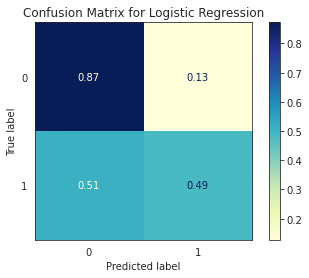

In [184]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Logistic Regression')
plt.show(matrix)

In [185]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7299270072992701
Precision = 0.7244147181987258
Recall = 0.6802893837806236
f1-Score = 0.7173459982757199


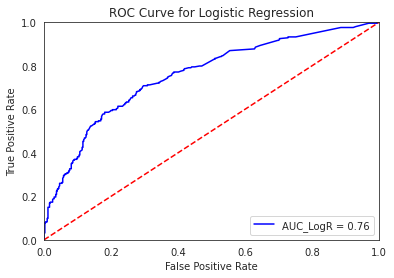

In [186]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_LogR, tpr_LogR, threshold = roc_curve(Y_Test, Probs)
roc_auc_LogR = auc(fpr_LogR, tpr_LogR)
#
plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr_LogR, tpr_LogR, 'b', label = 'AUC_LogR = %0.2f' % roc_auc_LogR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [187]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,0
0,0
1,0
1,0
0,0
1,0
0,0
1,1
1,1
1,1
0,0
1,0
1,1
1,1
0,0
0,0
0,0
1,1
0,0
1,1
1,1
0,0
0,0
0,0
1,1
1,0
0,1
0,0
1,0
0,0
0,0
0,0
0,0
1,0
0,0
1,1
0,1
1,1
0,0
0,0
0,0
1,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,1
0,0
1,1
1,1
0,0
1,0
0,0
1,0
0,0
0,0
1,1
0,0
0,0
0,0
1,0
0,0
1,0
1,1
0,0
0,0
1,0
0,0
0,0
0,1
0,1
0,1
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,0
0,0
1,1
0,1
0,0
1,0
0,0
1,0
1,1
0,0
1,1
0,0
1,0
0,0
1,0
0,0
0,0
0,0
1,0
1,1
0,0
1,0
0,0
0,0
0,1
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
1,0
0,0
0,1
0,0
1,0
0,0
1,0
1,0
0,0
0,0
0,1
0,0
1,0
0,0
1,0
0,1
1,0
1,1
0,0
1,0
1,1
1,1
0,1
0,1
0,0
0,0
0,1
0,0
0,0
0,1
0,0
0,0
0,0
1,0
0,0
0,0
1,0
0,0
1,1
0,0
0,0
1,0
1,0
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,1
0,0
0,0
0,0
1,0
1,0
0,0
0,1
1,1
0,0
0,0
1,0
1,1
0,1
0,0
1,0
1,1
1,0
1,0
1,1
0,0
1,0
0,0
1,0
1,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
1,1
0,1
0,0
0,0
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
0,0
1,1
1,0
1,0
0,0
0,0
0,0
1,1
1,1
0,0


##### K-Nearest Neighbour (KNN) Classifier

In [188]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 19)
neigh = neigh.fit(X_Train, Y_Train)
Preds = neigh.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = neigh.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.306569
Score for Willingness: 0.709018


In [189]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[374,  57],
       [153, 101]])

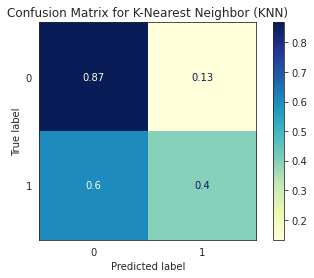

In [190]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(neigh, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for K-Nearest Neighbor (KNN)')
plt.show(matrix)

In [191]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.6934306569343066
Precision = 0.6835592063496795
Recall = 0.6326936076145935
f1-Score = 0.6730743083950114


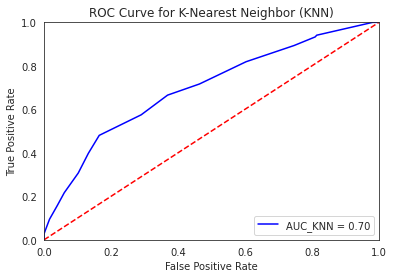

In [192]:
Probs = neigh.predict_proba(X_Test)[:,1]
fpr_KNN, tpr_KNN, threshold = roc_curve(Y_Test, Probs)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
#
plt.title('ROC Curve for K-Nearest Neighbor (KNN)')
plt.plot(fpr_KNN, tpr_KNN, 'b', label = 'AUC_KNN = %0.2f' % roc_auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [193]:
Probs.shape

(685,)

In [194]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,0
0,0
1,0
1,0
0,1
1,0
0,0
1,0
1,0
1,1
0,0
1,0
1,1
1,0
0,0
0,0
0,0
1,1
0,0
1,1
1,1
0,0
0,1
0,0
1,1
1,0
0,1
0,0
1,1
0,0
0,0
0,1
0,0
1,1
0,0
1,1
0,0
1,0
0,0
0,0
0,0
1,0
0,0
0,0
1,0
0,0
0,0
0,0
0,1
0,0
0,0
0,1
0,0
1,1
1,1
0,0
1,0
0,0
1,0
0,0
0,0
1,0
0,0
0,0
0,0
1,0
0,0
1,0
1,1
0,1
0,0
1,0
0,0
0,0
0,1
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,0
0,1
0,0
1,1
0,1
0,0
1,0
0,0
1,1
1,1
0,1
1,1
0,0
1,0
0,0
1,0
0,1
0,0
0,1
1,0
1,0
0,0
1,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,1
1,0
0,0
1,1
1,0
0,0
0,0
0,1
0,0
1,0
0,0
1,0
0,1
1,0
1,0
0,0
1,0
1,1
1,1
0,0
0,1
0,0
0,0
0,0
0,0
0,0
0,1
0,0
0,0
0,0
1,1
0,0
0,0
1,0
0,0
1,1
0,0
0,0
1,0
1,0
1,1
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
0,0
0,0
0,0
1,0
1,0
0,0
0,0
1,1
0,0
0,0
1,0
1,0
0,1
0,0
1,0
1,1
1,0
1,0
1,1
0,0
1,0
0,0
1,0
1,0
1,1
0,0
0,0
0,0
0,1
0,0
1,1
1,0
0,1
0,0
0,0
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
0,1
1,1
1,0
1,0
0,0
0,0
0,0
1,0
1,1
0,0


##### Support Vector Machine (SVM) Classifier(s) - SVCs

In [195]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability= True))
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.277372
Score for Willingness: 0.748083


In [196]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[352,  79],
       [111, 143]])

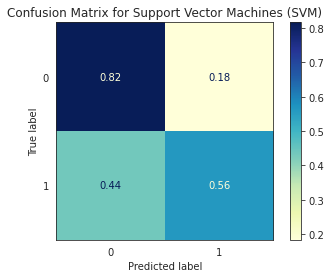

In [197]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Support Vector Machines (SVM)')
plt.show(matrix)

In [198]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7226277372262774
Precision = 0.7172033852206008
Recall = 0.689848731205583
f1-Score = 0.7182684566502836


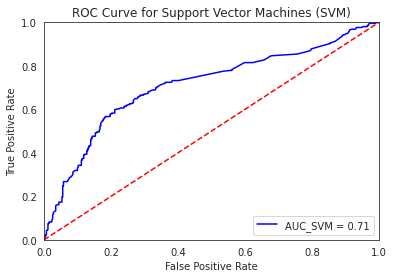

In [199]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_SVM, tpr_SVM, threshold = roc_curve(Y_Test, Probs)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
#
plt.title('ROC Curve for Support Vector Machines (SVM)')
plt.plot(fpr_SVM, tpr_SVM, 'b', label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Stochastic Gradient Descent (SGD) Classifier

In [200]:
from sklearn.linear_model import SGDClassifier
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, loss='log'))
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.300730
Score for Willingness: 0.692223


In [201]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[372,  59],
       [147, 107]])

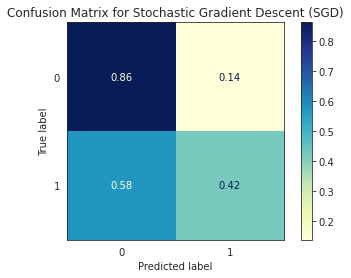

In [202]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Stochastic Gradient Descent (SGD)')
plt.show(matrix)

In [203]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.6992700729927007
Precision = 0.6899967110329848
Recall = 0.6421844456217914
f1-Score = 0.681693577008214


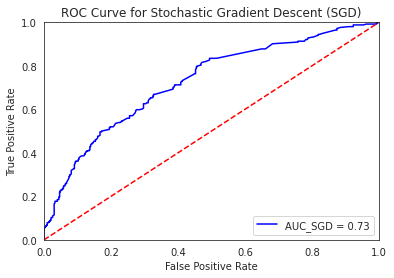

In [204]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_SGD, tpr_SGD, threshold = roc_curve(Y_Test, Probs)
roc_auc_SGD = auc(fpr_SGD, tpr_SGD)
#
plt.title('ROC Curve for Stochastic Gradient Descent (SGD)')
plt.plot(fpr_SGD, tpr_SGD, 'b', label = 'AUC_SGD = %0.2f' % roc_auc_SGD)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Decision Tree Classifier

In [205]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.347445
Score for Willingness: 0.809419


In [206]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[358,  73],
       [165,  89]])

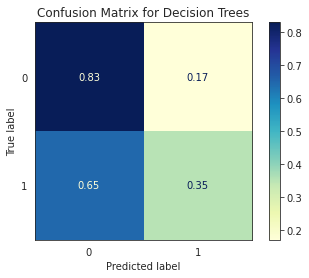

In [207]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Decision Trees')
plt.show(matrix)

In [208]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.6525547445255474
Precision = 0.6344059364570825
Recall = 0.5905100754517054
f1-Score = 0.630888442763529


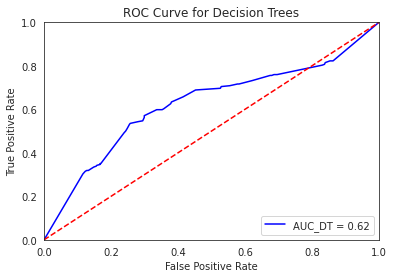

In [209]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_DT, tpr_DT, threshold = roc_curve(Y_Test, Probs)
roc_auc_DT = auc(fpr_DT, tpr_DT)
#
plt.title('ROC Curve for Decision Trees')
plt.plot(fpr_DT, tpr_DT, 'b', label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### GradBoost Classifier

In [210]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.283212
Score for Willingness: 0.730194


In [211]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[358,  73],
       [121, 133]])

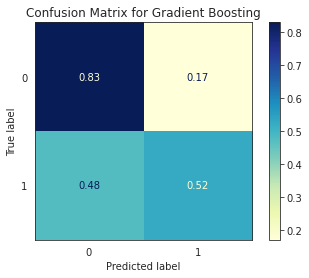

In [212]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show(matrix)

In [213]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7167883211678832
Precision = 0.7096577404707591
Recall = 0.6771242486800519
f1-Score = 0.7094813786657648


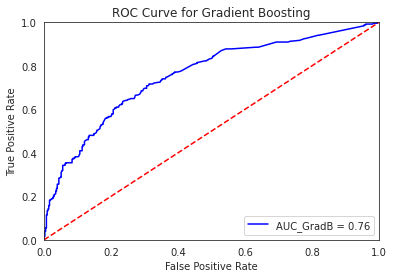

In [214]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_GradB, tpr_GradB, threshold = roc_curve(Y_Test, Probs)
roc_auc_GradB = auc(fpr_GradB, tpr_GradB)
#
plt.title('ROC Curve for Gradient Boosting')
plt.plot(fpr_GradB, tpr_GradB, 'b', label = 'AUC_GradB = %0.2f' % roc_auc_GradB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Random Forest Classifier

In [215]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.331387
Score for Willingness: 0.809419


In [216]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[348,  83],
       [144, 110]])

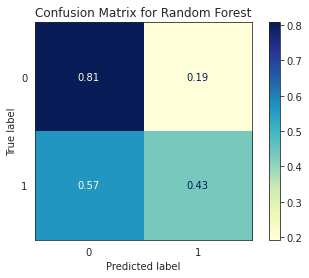

In [217]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Random Forest')
plt.show(matrix)

In [218]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.6686131386861314
Precision = 0.6563802889267498
Recall = 0.6202477300546249
f1-Score = 0.6569522176729128


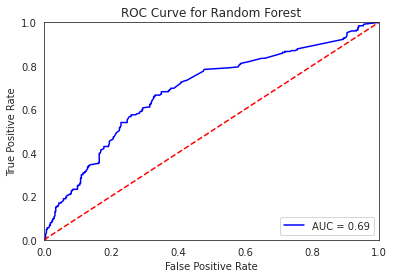

In [219]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_RF, tpr_RF, threshold = roc_curve(Y_Test, Probs)
roc_auc_RF = auc(fpr_RF, tpr_RF)
#
plt.title('ROC Curve for Random Forest')
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [220]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,0
0,0
1,0
1,0
0,1
1,0
0,0
1,0
1,1
1,1
0,0
1,0
1,1
1,0
0,1
0,0
0,0
1,1
0,0
1,1
1,0
0,0
0,1
0,0
1,1
1,0
0,1
0,0
1,1
0,0
0,0
0,1
0,0
1,0
0,0
1,1
0,0
1,0
0,0
0,0
0,0
1,0
0,0
0,0
1,0
0,0
0,0
0,0
0,1
0,0
0,0
0,1
0,1
1,1
1,1
0,0
1,1
0,0
1,0
0,0
0,0
1,1
0,0
0,0
0,0
1,0
0,1
1,0
1,1
0,1
0,0
1,0
0,0
0,0
0,1
0,0
0,1
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,1
0,0
1,1
0,1
0,1
1,1
0,0
1,0
1,0
0,0
1,1
0,1
1,0
0,0
1,1
0,0
0,0
0,0
1,0
1,0
0,0
1,0
0,0
0,1
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
1,0
0,0
0,1
0,1
1,0
0,0
1,0
1,0
0,0
0,0
0,1
0,1
1,0
0,0
1,0
0,1
1,0
1,1
0,0
1,0
1,1
1,0
0,1
0,1
0,0
0,1
0,1
0,1
0,0
0,1
0,0
0,0
0,0
1,1
0,0
0,0
1,0
0,1
1,1
0,0
0,0
1,0
1,0
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,1
0,0
0,0
0,0
1,0
1,0
0,0
0,1
1,0
0,0
0,0
1,0
1,1
0,0
0,0
1,0
1,1
1,0
1,0
1,1
0,0
1,0
0,0
1,1
1,0
1,1
0,0
0,0
0,0
0,1
0,0
1,1
1,1
0,1
0,1
0,0
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,0
0,1
1,0
1,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0


##### Extra-Trees Classifier

In [221]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.340146
Score for Willingness: 0.809419


In [222]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[355,  76],
       [157,  97]])

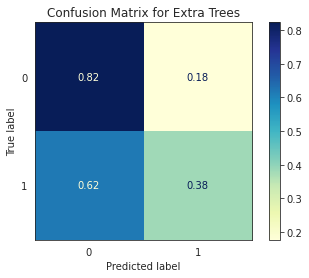

In [223]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Extra Trees')
plt.show(matrix)

In [224]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.6598540145985401
Precision = 0.6441665337169318
Recall = 0.6027778285254946
f1-Score = 0.6422005274147312


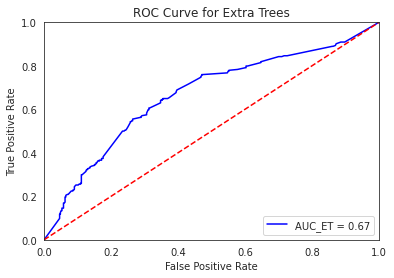

In [225]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_ET, tpr_ET, threshold = roc_curve(Y_Test, Probs)
roc_auc_ET = auc(fpr_ET, tpr_ET)
#
plt.title('ROC Curve for Extra Trees')
plt.plot(fpr_ET, tpr_ET, 'b', label = 'AUC_ET = %0.2f' % roc_auc_ET)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### AdaBoost Classifier

In [226]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.277372
Score for Willingness: 0.717780


In [227]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[376,  55],
       [135, 119]])

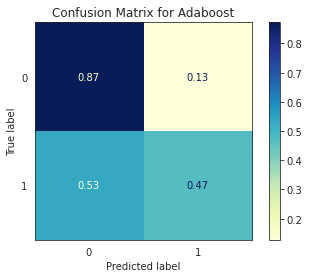

In [228]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Adaboost')
plt.show(matrix)

In [229]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7226277372262774
Precision = 0.7165659460326546
Recall = 0.6704468640955843
f1-Score = 0.70848311124996


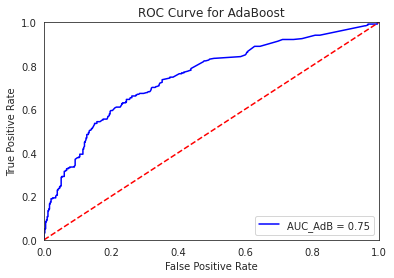

In [230]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_AdB, tpr_AdB, threshold = roc_curve(Y_Test, Probs)
roc_auc_AdB = auc(fpr_AdB, tpr_AdB)
#
plt.title('ROC Curve for AdaBoost')
plt.plot(fpr_AdB, tpr_AdB, 'b', label = 'AUC_AdB = %0.2f' % roc_auc_AdB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### XgBoost Classifier

In [231]:
import xgboost as xgb
clf = xgb.XGBClassifier(objective='reg:tweedie')
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.281752
Score for Willingness: 0.726177


In [232]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[377,  54],
       [139, 115]])

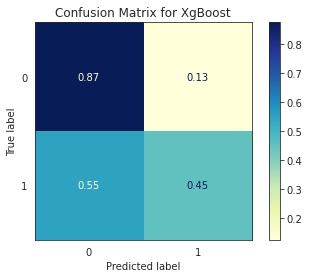

In [233]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for XgBoost')
plt.show(matrix)

In [234]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7182481751824817
Precision = 0.7120255817636437
Recall = 0.6637329411549775
f1-Score = 0.702584393977966


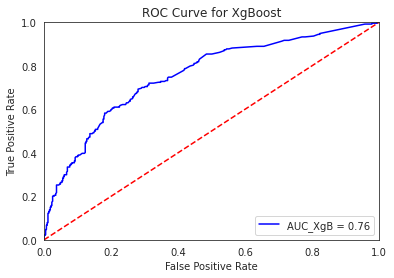

In [235]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_XgB, tpr_XgB, threshold = roc_curve(Y_Test, Probs)
roc_auc_XgB = auc(fpr_XgB, tpr_XgB)
#
plt.title('ROC Curve for XgBoost')
plt.plot(fpr_XgB, tpr_XgB, 'b', label = 'AUC_XgB = %0.2f' % roc_auc_XgB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Multi-Layer Perceptron (MLP) Classifier

In [236]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=1000)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.315328
Score for Willingness: 0.778021


In [237]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[344,  87],
       [129, 125]])

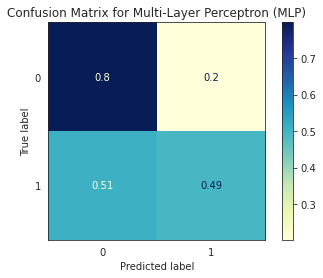

In [238]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Multi-Layer Perceptron (MLP)')
plt.show(matrix)

In [239]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.6846715328467153
Precision = 0.6762316735736376
Recall = 0.6451349178800445
f1-Score = 0.6777865599060513


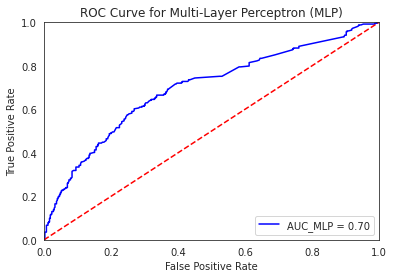

In [240]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_MLP, tpr_MLP, threshold = roc_curve(Y_Test, Probs)
roc_auc_MLP = auc(fpr_MLP, tpr_MLP)
#
plt.title('ROC Curve for Multi-Layer Perceptron (MLP)')
plt.plot(fpr_MLP, tpr_MLP, 'b', label = 'AUC_MLP = %0.2f' % roc_auc_MLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Combined ROC Plot(s)

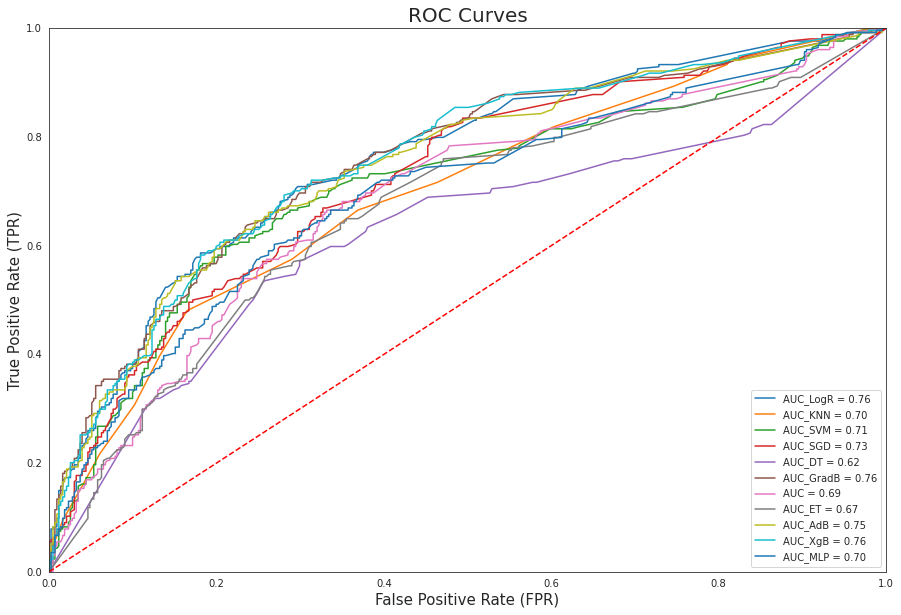

In [241]:
plt.figure(figsize = (15,10))
plt.title('ROC Curves', fontsize = 20)
plt.plot(fpr_LogR, tpr_LogR, label = 'AUC_LogR = %0.2f' % roc_auc_LogR)
plt.plot(fpr_KNN, tpr_KNN, label = 'AUC_KNN = %0.2f' % roc_auc_KNN)
plt.plot(fpr_SVM, tpr_SVM, label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.plot(fpr_SGD, tpr_SGD, label = 'AUC_SGD = %0.2f' % roc_auc_SGD)
plt.plot(fpr_DT, tpr_DT, label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.plot(fpr_GradB, tpr_GradB, label = 'AUC_GradB = %0.2f' % roc_auc_GradB)
plt.plot(fpr_RF, tpr_RF, label = 'AUC = %0.2f' % roc_auc_RF)
plt.plot(fpr_ET, tpr_ET, label = 'AUC_ET = %0.2f' % roc_auc_ET)
plt.plot(fpr_AdB, tpr_AdB, label = 'AUC_AdB = %0.2f' % roc_auc_AdB)
plt.plot(fpr_XgB, tpr_XgB, label = 'AUC_XgB = %0.2f' % roc_auc_XgB)
plt.plot(fpr_MLP, tpr_MLP, label = 'AUC_MLP = %0.2f' % roc_auc_MLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)', fontsize = 15)
plt.xlabel('False Positive Rate (FPR)', fontsize = 15)
plt.show()

### Feature Extraction using  Autoencoder and apply ML on the Feature Set

Train-Test Split Dataset - 20% for Testing

In [242]:
X_Data = df_dummy.iloc[:,0:-1].values
Y_Data = df_dummy.iloc[:,-1].values

In [243]:
print(X_Data.shape)
print(Y_Data.shape)

(3424, 118)
(3424,)


In [244]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.20, random_state=42)

In [245]:
print(X_Train.shape, X_Test.shape)
print(Y_Train.shape, Y_Test.shape)

(2739, 118) (685, 118)
(2739,) (685,)


In [246]:
X_Train = X_Train.astype('int')
X_Test = X_Test.astype('int')
Y_Train = Y_Train.astype('int')
Y_Test = Y_Test.astype('int')

Prepare U-Net based AutoEncoder

In [247]:
from Unet_1DCNN import Unet

Representation of the U-Net Segmentation Model

/content


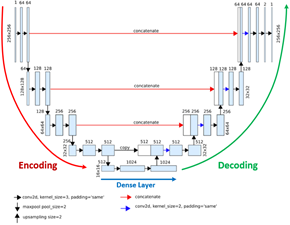

In [248]:
%cd /content/
PIL.Image.open('Unet_Model.png')

Autoencoder Pipeline

/content


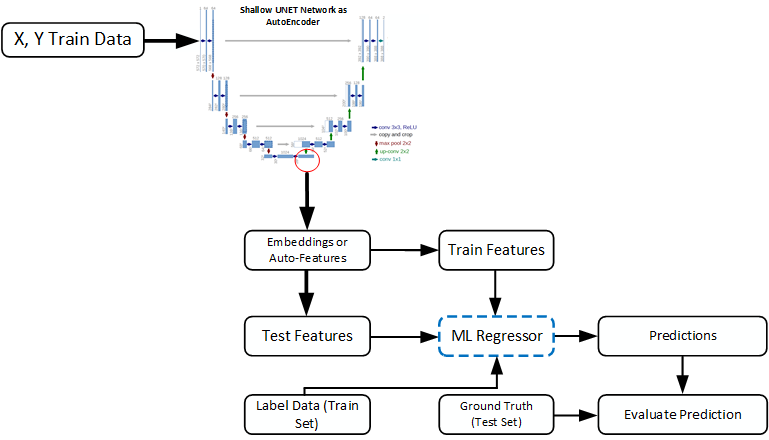

In [249]:
%cd /content/
PIL.Image.open('AE_Pipeline.png')

In [579]:
# General Parameters
feature_number = 2
signal_length = X_Train.shape[1]
# Extra Parameters
num_channel = 1
model_depth = 1
model_width = 128
kernel_size = 3

In [580]:
# Build model for PPG2BP - Shallow-Wide U-net as AutoEncoder
# D_S shoud be FALSE or '0' for the AutoEncoder Model
# D_S = 0 # Deep Supervision ON/OFF; A_E = 1 # AutoEncoder Model ON/OFF
AutoEnc_Unet = Unet(signal_length, model_depth, num_channel, model_width, kernel_size, 0, 1, feature_number,)
AutoEnc_Unet.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
AutoEnc_Unet.load_weights('/content/Model.h5')

In [581]:
callbacks = [EarlyStopping(monitor='val_loss', patience=20, mode='min'),
            ModelCheckpoint('/content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+/Model.h5', verbose=1, monitor='val_loss', save_best_only= True, mode= 'min')]
AutoEnc_Unet.fit(X_Train, Y_Train, epochs= 100, batch_size= 128, verbose= 1, validation_split= 0.2, shuffle= True, callbacks= callbacks)

Epoch 1/100
18/18 [==============================] - 3s 36ms/step - loss: 0.6514 - mae: 0.5298 - val_loss: 0.2558 - val_mae: 0.3560

Epoch 00001: val_loss improved from inf to 0.25582, saving model to /content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+/Model.h5
Epoch 2/100
18/18 [==============================] - 0s 12ms/step - loss: 0.0421 - mae: 0.1219 - val_loss: 0.2341 - val_mae: 0.3389

Epoch 00002: val_loss improved from 0.25582 to 0.23408, saving model to /content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+/Model.h5
Epoch 3/100
18/18 [==============================] - 0s 12ms/step - loss: 0.0352 - mae: 0.1060 - val_loss: 0.2129 - val_mae: 0.3188

Epoch 00003: val_loss improved from 0.23408 to 0.21293, saving model to /content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+/Model.h5
Epoch 4/100
18/18 [==============================] - 0s 12ms/step - loss: 0.0357 - mae: 0.0940 - val_loss: 0.2071 - val_mae: 0.3145

Epoch 00004: val_lo

In [582]:
UNETAE_Feature_Extractor = Model(inputs= AutoEnc_Unet.input, outputs= AutoEnc_Unet.get_layer('features').output)

In [583]:
Train_Features = UNETAE_Feature_Extractor.predict(X_Train)
Test_Features = UNETAE_Feature_Extractor.predict(X_Test)

In [584]:
Train_Features.shape

(2739, 2)

In [585]:
X_Train = Train_Features
X_Test = Test_Features

So it can be seen that the resulting transformed feature set is of much lower dimension than the original dataset (detail comparison is done in the report). Now, both will be trained to see if this compact feature set can really perform similar or even better than the whole, original dataset.

#### Machine Learning (ML)

##### Logistic Regression based Classifier

In [586]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error: %f" % MAE)
print("Score: %f" % Score)

Mean Absolute Error: 0.245255
Score: 0.918583


In [587]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[356,  75],
       [ 93, 161]])

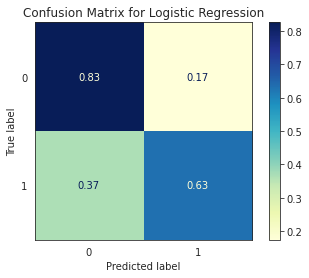

In [588]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Logistic Regression')
plt.show(matrix)

In [589]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7547445255474453
Precision = 0.7518364176567885
Recall = 0.7299221733014232
f1-Score = 0.7527481277846242


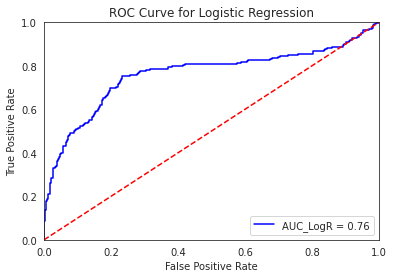

In [590]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_LogR, tpr_LogR, threshold = roc_curve(Y_Test, Probs)
roc_auc_LogR = auc(fpr_LogR, tpr_LogR)
#
plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr_LogR, tpr_LogR, 'b', label = 'AUC_LogR = %0.2f' % roc_auc_LogR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [591]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,1
0,1
1,0
1,1
0,0
1,1
0,0
1,1
1,1
1,0
0,0
1,1
1,1
1,1
0,1
0,0
0,0
1,1
0,0
1,1
1,0
0,0
0,0
0,0
1,1
1,0
0,0
0,0
1,0
0,0
0,1
0,0
0,0
1,0
0,1
1,1
0,1
1,0
0,0
0,0
0,0
1,1
0,0
0,0
1,1
0,0
0,1
0,0
0,0
0,0
0,1
0,0
0,1
1,0
1,0
0,0
1,0
0,0
1,0
0,0
0,0
1,1
0,0
0,0
0,0
1,0
0,0
1,0
1,1
0,1
0,0
1,0
0,0
0,1
0,1
0,1
0,1
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,1
0,0
1,1
0,0
0,0
1,0
0,0
1,1
1,1
0,1
1,1
0,0
1,1
0,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0
1,1
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,1
0,0
0,0
0,0
0,0
0,0
1,0
0,1
0,0
0,0
0,0
1,1
0,0
0,1
0,0
1,0
0,0
1,1
1,0
0,0
0,0
0,0
0,1
1,0
0,1
1,0
0,0
1,1
1,0
0,0
1,0
1,1
1,0
0,0
0,0
0,0
0,1
0,0
0,0
0,0
0,1
0,0
0,0
0,0
1,1
0,0
0,0
1,1
0,0
1,1
0,0
0,0
1,1
1,1
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,1
0,0
0,0
0,0
1,0
1,0
0,0
0,1
1,1
0,0
0,0
1,0
1,1
0,0
0,0
1,1
1,1
1,0
1,0
1,1
0,0
1,0
0,1
1,0
1,0
1,1
0,0
0,0
0,1
0,1
0,0
1,0
1,1
0,1
0,0
0,0
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,1
0,1
0,0
1,0
1,1
1,1
0,1
0,0
0,1
1,1
1,1
0,0


##### K-Nearest Neighbour (KNN) Classifier

In [648]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 7)
neigh = neigh.fit(X_Train, Y_Train)
Preds = neigh.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = neigh.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.242336
Score for Willingness: 0.926250


In [593]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[347,  84],
       [ 83, 171]])

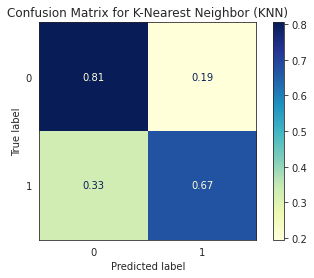

In [594]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(neigh, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for K-Nearest Neighbor (KNN)')
plt.show(matrix)

In [595]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7562043795620438
Precision = 0.7564034868742948
Recall = 0.7391663774046806
f1-Score = 0.7563022874390659


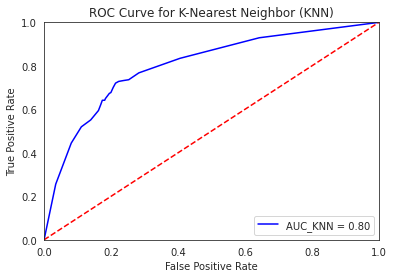

In [596]:
Probs = neigh.predict_proba(X_Test)[:,1]
fpr_KNN, tpr_KNN, threshold = roc_curve(Y_Test, Probs)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
#
plt.title('ROC Curve for K-Nearest Neighbor (KNN)')
plt.plot(fpr_KNN, tpr_KNN, 'b', label = 'AUC_KNN = %0.2f' % roc_auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [597]:
Probs.shape

(685,)

In [598]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,1
0,1
1,0
1,1
0,0
1,1
0,0
1,1
1,1
1,0
0,0
1,1
1,1
1,1
0,1
0,0
0,0
1,1
0,0
1,1
1,0
0,0
0,0
0,0
1,1
1,1
0,0
0,0
1,0
0,0
0,1
0,0
0,0
1,0
0,1
1,1
0,1
1,0
0,0
0,0
0,0
1,1
0,0
0,0
1,1
0,0
0,1
0,0
0,1
0,0
0,1
0,0
0,1
1,0
1,0
0,0
1,0
0,0
1,0
0,0
0,1
1,1
0,0
0,0
0,0
1,0
0,0
1,1
1,1
0,1
0,0
1,1
0,0
0,1
0,1
0,1
0,1
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,1
0,0
1,1
0,0
0,0
1,0
0,0
1,1
1,1
0,1
1,1
0,0
1,1
0,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0
1,1
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,1
0,0
0,0
0,0
0,0
0,0
1,0
0,1
0,0
0,0
0,0
1,1
0,0
0,1
0,0
1,0
0,0
1,1
1,0
0,0
0,1
0,0
0,1
1,0
0,1
1,0
0,0
1,1
1,0
0,0
1,0
1,1
1,0
0,0
0,0
0,0
0,1
0,0
0,0
0,0
0,1
0,0
0,0
0,0
1,1
0,0
0,0
1,1
0,0
1,1
0,0
0,0
1,1
1,1
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,1
0,0
0,0
0,0
1,1
1,0
0,0
0,1
1,1
0,0
0,0
1,0
1,1
0,1
0,0
1,1
1,1
1,0
1,0
1,1
0,0
1,0
0,1
1,0
1,0
1,1
0,0
0,0
0,1
0,1
0,0
1,0
1,1
0,1
0,0
0,0
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,1
0,1
0,0
1,1
1,1
1,1
0,1
0,1
0,1
1,1
1,1
0,0


##### Support Vector Machine (SVM) Classifier(s) - SVCs

In [599]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability= True))
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.242336
Score for Willingness: 0.919314


In [600]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[353,  78],
       [ 88, 166]])

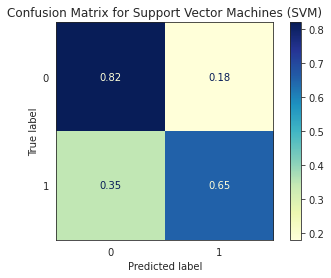

In [601]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Support Vector Machines (SVM)')
plt.show(matrix)

In [602]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7576642335766424
Precision = 0.755910574512602
Recall = 0.7362844145641887
f1-Score = 0.7566206834973994


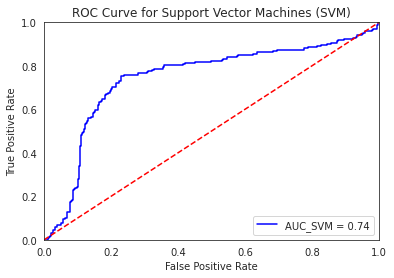

In [603]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_SVM, tpr_SVM, threshold = roc_curve(Y_Test, Probs)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
#
plt.title('ROC Curve for Support Vector Machines (SVM)')
plt.plot(fpr_SVM, tpr_SVM, 'b', label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Stochastic Gradient Descent (SGD) Classifier

In [604]:
from sklearn.linear_model import SGDClassifier
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, loss='log'))
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.239416
Score for Willingness: 0.918218


In [605]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[354,  77],
       [ 87, 167]])

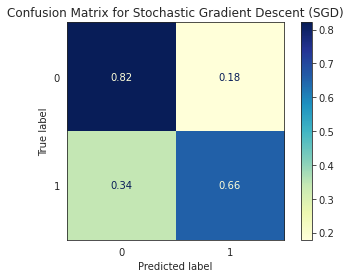

In [606]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Stochastic Gradient Descent (SGD)')
plt.show(matrix)

In [607]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7605839416058394
Precision = 0.7588570093587274
Recall = 0.7394130113086212
f1-Score = 0.7595529644191176


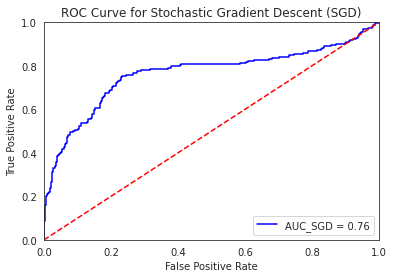

In [608]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_SGD, tpr_SGD, threshold = roc_curve(Y_Test, Probs)
roc_auc_SGD = auc(fpr_SGD, tpr_SGD)
#
plt.title('ROC Curve for Stochastic Gradient Descent (SGD)')
plt.plot(fpr_SGD, tpr_SGD, 'b', label = 'AUC_SGD = %0.2f' % roc_auc_SGD)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Decision Tree Classifier

In [609]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.264234
Score for Willingness: 1.000000


In [610]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[337,  94],
       [ 87, 167]])

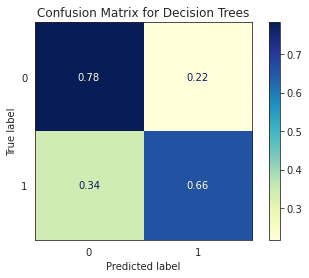

In [611]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Decision Trees')
plt.show(matrix)

In [612]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7357664233576642
Precision = 0.73735000298134
Recall = 0.7196914335824032
f1-Score = 0.7364805276129401


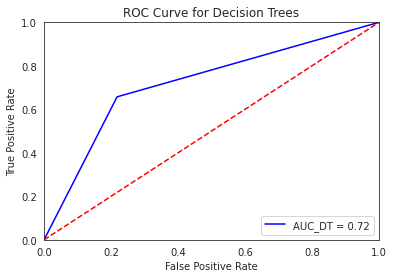

In [613]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_DT, tpr_DT, threshold = roc_curve(Y_Test, Probs)
roc_auc_DT = auc(fpr_DT, tpr_DT)
#
plt.title('ROC Curve for Decision Trees')
plt.plot(fpr_DT, tpr_DT, 'b', label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### GradBoost Classifier

In [614]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.252555
Score for Willingness: 0.934648


In [615]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[343,  88],
       [ 85, 169]])

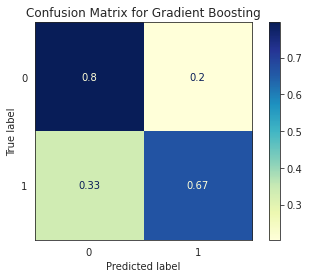

In [616]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show(matrix)

In [617]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7474452554744525
Precision = 0.7480750992139594
Recall = 0.7305889983009665
f1-Score = 0.7477455946406025


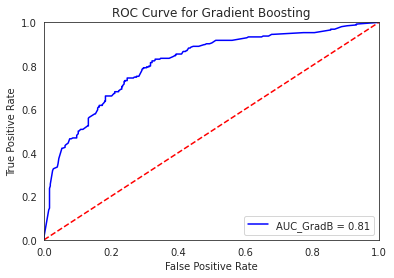

In [618]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_GradB, tpr_GradB, threshold = roc_curve(Y_Test, Probs)
roc_auc_GradB = auc(fpr_GradB, tpr_GradB)
#
plt.title('ROC Curve for Gradient Boosting')
plt.plot(fpr_GradB, tpr_GradB, 'b', label = 'AUC_GradB = %0.2f' % roc_auc_GradB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Random Forest Classifier

In [619]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.242336
Score for Willingness: 1.000000


In [620]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[349,  82],
       [ 84, 170]])

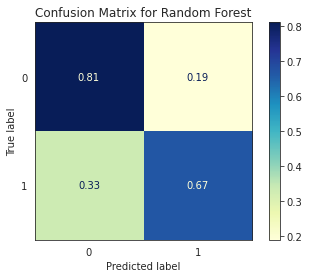

In [621]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Random Forest')
plt.show(matrix)

In [622]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7576642335766424
Precision = 0.7572805797245709
Recall = 0.7395180590825219
f1-Score = 0.7574657903482085


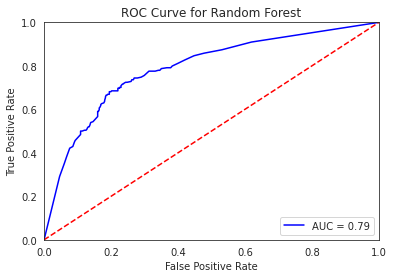

In [623]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_RF, tpr_RF, threshold = roc_curve(Y_Test, Probs)
roc_auc_RF = auc(fpr_RF, tpr_RF)
#
plt.title('ROC Curve for Random Forest')
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [624]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,1
0,1
1,0
1,1
0,0
1,1
0,0
1,1
1,1
1,0
0,0
1,1
1,1
1,1
0,1
0,0
0,0
1,1
0,0
1,1
1,0
0,0
0,0
0,0
1,1
1,1
0,0
0,0
1,0
0,0
0,1
0,0
0,0
1,0
0,1
1,1
0,1
1,0
0,0
0,0
0,0
1,1
0,0
0,0
1,1
0,0
0,1
0,0
0,1
0,0
0,0
0,0
0,1
1,0
1,0
0,0
1,0
0,0
1,0
0,0
0,0
1,1
0,0
0,0
0,0
1,0
0,0
1,1
1,1
0,1
0,0
1,1
0,0
0,1
0,1
0,1
0,1
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,1
0,0
1,1
0,0
0,0
1,1
0,1
1,1
1,1
0,1
1,1
0,0
1,1
0,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0
1,1
0,0
0,0
0,0
1,0
0,0
0,1
0,0
0,0
0,1
0,0
0,0
0,0
0,0
0,0
1,0
0,1
0,0
0,0
0,0
1,1
0,0
0,1
0,0
1,0
0,0
1,1
1,0
0,0
0,1
0,0
0,1
1,0
0,1
1,0
0,0
1,1
1,0
0,0
1,0
1,1
1,0
0,0
0,0
0,0
0,1
0,0
0,0
0,0
0,1
0,0
0,0
0,1
1,1
0,0
0,0
1,1
0,0
1,1
0,0
0,0
1,1
1,1
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
1,0
0,0
0,1
1,1
0,0
0,0
1,0
1,1
0,0
0,0
1,1
1,1
1,0
1,0
1,1
0,0
1,0
0,1
1,0
1,0
1,1
0,0
0,0
0,1
0,1
0,1
1,0
1,1
0,1
0,0
0,1
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,1
0,1
0,0
1,1
1,1
1,1
0,1
0,0
0,1
1,1
1,1
0,0


##### Extra-Trees Classifier

In [625]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.248175
Score for Willingness: 1.000000


In [626]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[348,  83],
       [ 87, 167]])

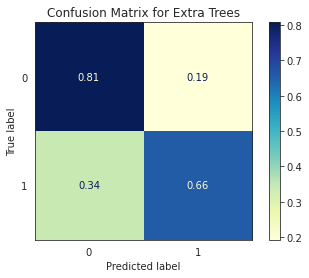

In [627]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Extra Trees')
plt.show(matrix)

In [628]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7518248175182481
Precision = 0.7510540145985402
Recall = 0.7324524544640737
f1-Score = 0.7514131482119211


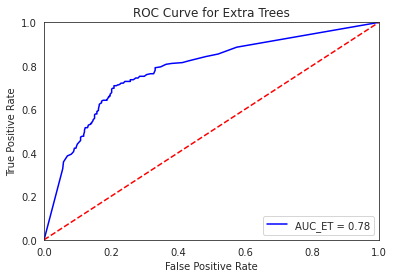

In [629]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_ET, tpr_ET, threshold = roc_curve(Y_Test, Probs)
roc_auc_ET = auc(fpr_ET, tpr_ET)
#
plt.title('ROC Curve for Extra Trees')
plt.plot(fpr_ET, tpr_ET, 'b', label = 'AUC_ET = %0.2f' % roc_auc_ET)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### AdaBoost Classifier

In [630]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.245255
Score for Willingness: 0.923695


In [631]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[345,  86],
       [ 82, 172]])

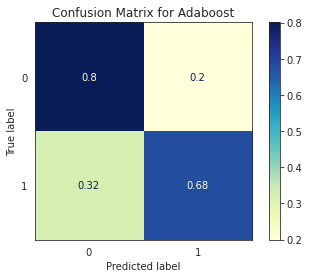

In [632]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Adaboost')
plt.show(matrix)

In [633]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7547445255474453
Precision = 0.7555696108765392
Recall = 0.7388146957268393
f1-Score = 0.7551308636618856


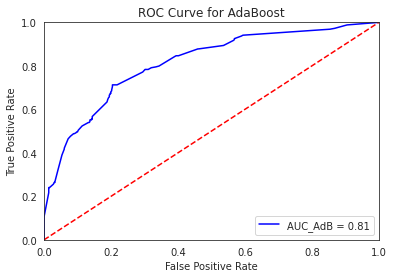

In [634]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_AdB, tpr_AdB, threshold = roc_curve(Y_Test, Probs)
roc_auc_AdB = auc(fpr_AdB, tpr_AdB)
#
plt.title('ROC Curve for AdaBoost')
plt.plot(fpr_AdB, tpr_AdB, 'b', label = 'AUC_AdB = %0.2f' % roc_auc_AdB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### XgBoost Classifier

In [635]:
import xgboost as xgb
clf = xgb.XGBClassifier(objective='reg:tweedie')
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.239416
Score for Willingness: 0.921139


In [636]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[344,  87],
       [ 77, 177]])

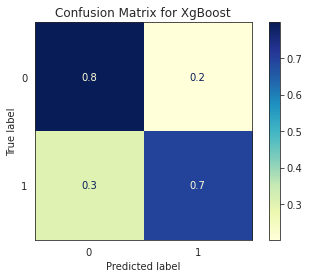

In [637]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for XgBoost')
plt.show(matrix)

In [638]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7605839416058394
Precision = 0.762724782369528
Recall = 0.747497122604454
f1-Score = 0.7614898836035876


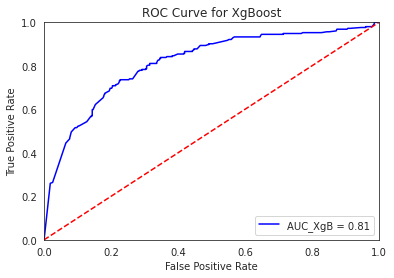

In [639]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_XgB, tpr_XgB, threshold = roc_curve(Y_Test, Probs)
roc_auc_XgB = auc(fpr_XgB, tpr_XgB)
#
plt.title('ROC Curve for XgBoost')
plt.plot(fpr_XgB, tpr_XgB, 'b', label = 'AUC_XgB = %0.2f' % roc_auc_XgB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Multi-Layer Perceptron (MLP) Classifier

In [640]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=1000)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.243796
Score for Willingness: 0.922234


In [641]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[347,  84],
       [ 83, 171]])

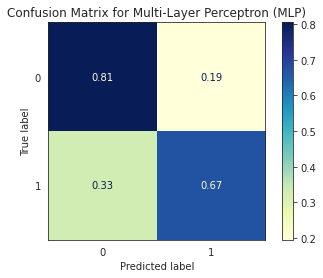

In [642]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Multi-Layer Perceptron (MLP)')
plt.show(matrix)

In [643]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7562043795620438
Precision = 0.7564034868742948
Recall = 0.7391663774046806
f1-Score = 0.7563022874390659


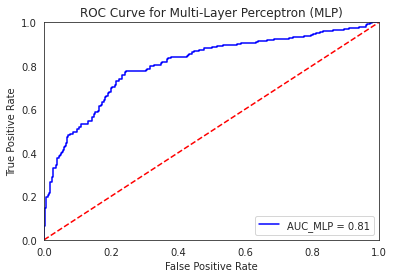

In [644]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_MLP, tpr_MLP, threshold = roc_curve(Y_Test, Probs)
roc_auc_MLP = auc(fpr_MLP, tpr_MLP)
#
plt.title('ROC Curve for Multi-Layer Perceptron (MLP)')
plt.plot(fpr_MLP, tpr_MLP, 'b', label = 'AUC_MLP = %0.2f' % roc_auc_MLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Combined ROC Plot(s)

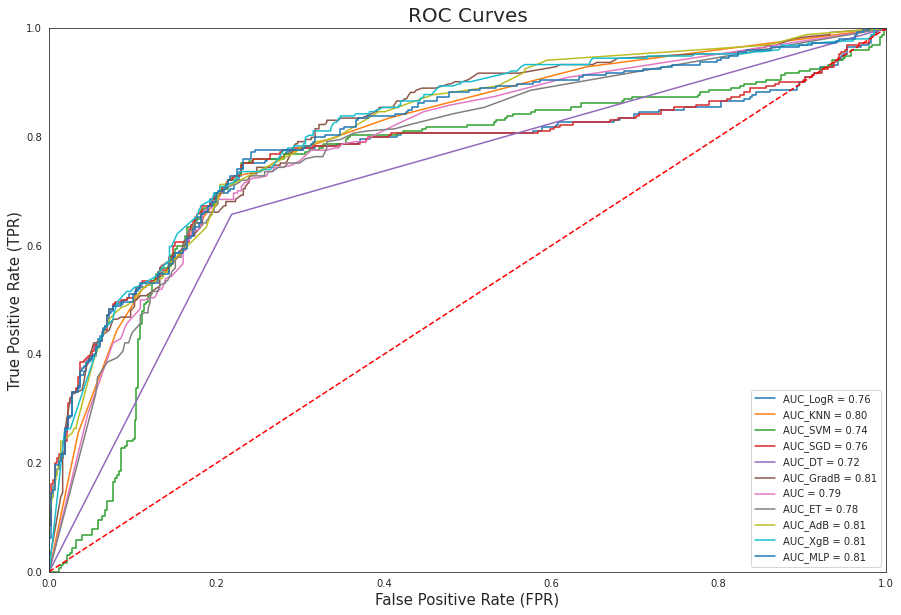

In [645]:
plt.figure(figsize = (15,10))
plt.title('ROC Curves', fontsize = 20)
plt.plot(fpr_LogR, tpr_LogR, label = 'AUC_LogR = %0.2f' % roc_auc_LogR)
plt.plot(fpr_KNN, tpr_KNN, label = 'AUC_KNN = %0.2f' % roc_auc_KNN)
plt.plot(fpr_SVM, tpr_SVM, label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.plot(fpr_SGD, tpr_SGD, label = 'AUC_SGD = %0.2f' % roc_auc_SGD)
plt.plot(fpr_DT, tpr_DT, label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.plot(fpr_GradB, tpr_GradB, label = 'AUC_GradB = %0.2f' % roc_auc_GradB)
plt.plot(fpr_RF, tpr_RF, label = 'AUC = %0.2f' % roc_auc_RF)
plt.plot(fpr_ET, tpr_ET, label = 'AUC_ET = %0.2f' % roc_auc_ET)
plt.plot(fpr_AdB, tpr_AdB, label = 'AUC_AdB = %0.2f' % roc_auc_AdB)
plt.plot(fpr_XgB, tpr_XgB, label = 'AUC_XgB = %0.2f' % roc_auc_XgB)
plt.plot(fpr_MLP, tpr_MLP, label = 'AUC_MLP = %0.2f' % roc_auc_MLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)', fontsize = 15)
plt.xlabel('False Positive Rate (FPR)', fontsize = 15)
plt.show()

## Evaluation of Results